# 1. Exploratory Data Analysis (EDA)

My EDA process was a systematic exploration of the chosen dataset to uncover patterns, identify anomalies, and inform subsequent feature engineering and model development. I applied three primary types of analysis:

**i. Univariate Analysis**

This analysis focused on the individual characteristics of the variables in the dataset. I used bar charts to visualize the class distribution of fire and smoke instances to check for imbalance. I also created histograms of bounding box dimensions for each class, which revealed that smoke plumes tend to be larger and have a different size distribution than fire instances.

**ii. Bivariate Analysis**

This analysis examined the relationship between two variables. A key finding came from comparing the average pixel intensity (Red, Green, and Blue) of images for the fire and smoke classes. Box plots showed that fire images had significantly higher average red values, while smoke images were characterized by a more neutral, grayish color profile. This confirmed that color is a strong distinguishing feature.

**iii. Multivariate Analysis**

This analysis looked at the relationships between three or more variables simultaneously. I visualized the connection between the size, aspect ratio, and class of the bounding boxes in a scatter plot. This showed that while fire instances were concentrated in a narrow range of sizes and shapes, smoke instances occupied a much wider and more varied distribution of dimensions, which is a crucial insight for the object detection model.

**Perform data visualization and chart selection (histograms, scatter plots, box plots, bar charts)**

**1. Bar Charts for Class Distribution**

This is a fundamental first step to check for class imbalance. An imbalanced dataset can lead to a model that performs well on the majority class but poorly on the minority class.
A bar chart showing the total count of **fire** instances and **smoke** instances. I start by counting each instance in my dataset.

In [2]:
import os
from collections import Counter

# Define the path to your dataset and the class names
dataset_path = "dataset"  # e.g., 'your_dataset/train'
class_names = {0: 'fire', 1: 'smoke'}

# Initialize a counter for each class
class_counts = Counter()

# Loop through all annotation files in the folder
for filename in os.listdir(dataset_path):
    if filename.endswith('.txt'):
        with open(os.path.join(dataset_path, filename), 'r') as f:
            for line in f.readlines():
                # Skip comment lines or empty lines
                if line.strip() and not line.startswith('#'):
                    try:
                        class_id = int(line.split()[0])
                        class_name = class_names[class_id]
                        class_counts[class_name] += 1
                    except (ValueError, IndexError, KeyError) as e:
                        # Handle potential errors in line format
                        print(f"Skipping invalid line in {filename}: {line.strip()} - Error: {e}")

print(class_counts)

Counter({'fire': 5077, 'smoke': 1624})


**Count the number of bounding box annotations for each class, 'fire' and 'smoke'.**

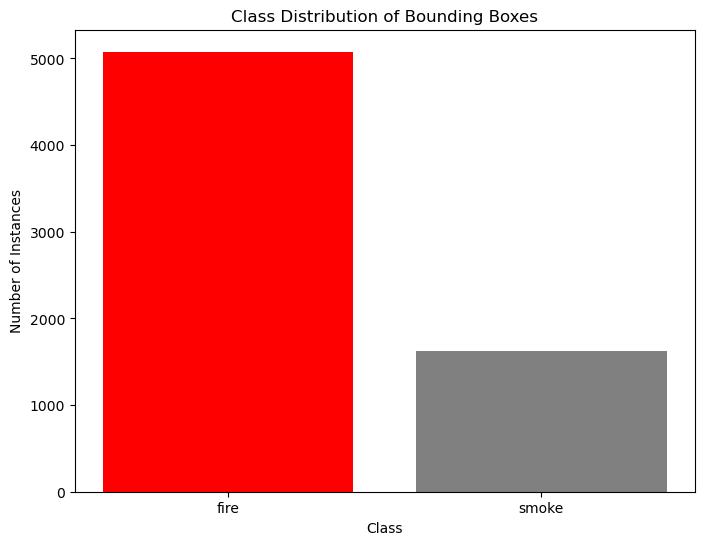

In [4]:
import matplotlib.pyplot as plt

# Example data (replace with your actual counts)
class_counts = {'fire': 5077, 'smoke': 1624}

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color=['red', 'gray'])
plt.title('Class Distribution of Bounding Boxes')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

A machine learning model, particularly a deep learning model, is likely to become biased towards the majority class ('fire'). It may get very good at detecting fire but perform poorly at detecting smoke, as it hasn't seen enough 'smoke' examples to learn its features effectively.

**2. Histograms and Scatter Plots (Bounding Box Dimensions)**

This code shows you how to read the normalized YOLO data, convert it to actual pixel dimensions, and then generate histograms and a scatter plot.

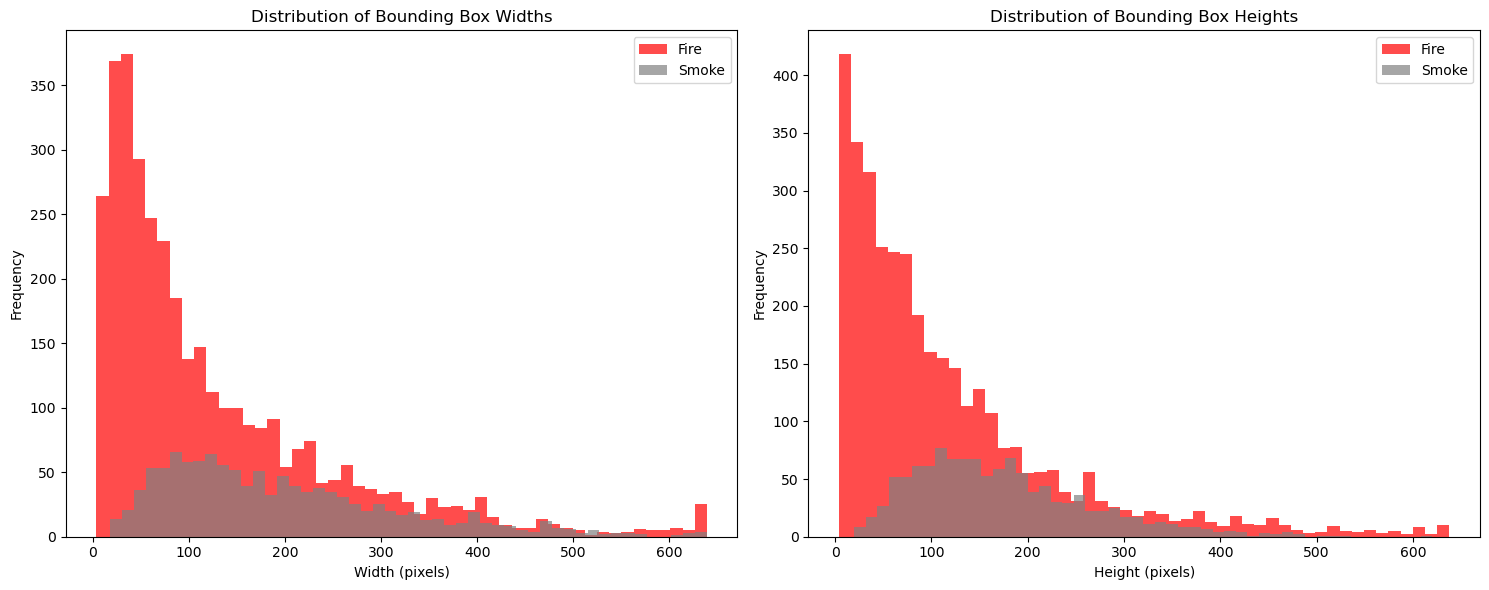

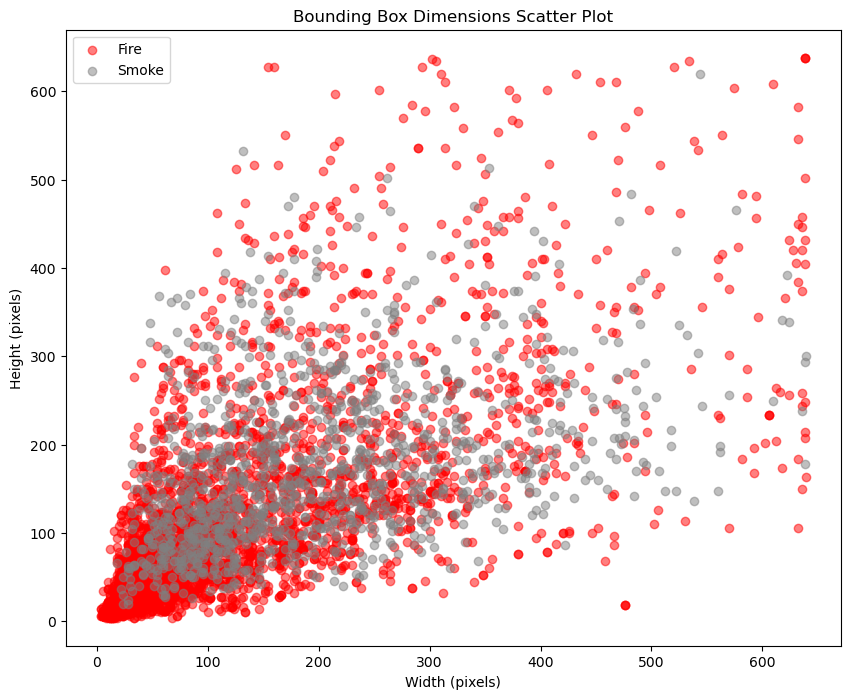

In [9]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Set your paths
dataset_root = 'dataset/train'
image_folder = os.path.join(dataset_root, 'images')
label_folder = os.path.join(dataset_root, 'labels')

fire_widths = []
fire_heights = []
smoke_widths = []
smoke_heights = []

# Loop through all label files
for filename in os.listdir(label_folder):
    if filename.endswith('.txt'):
        image_filename = filename.replace('.txt', '.jpg') #  .jpg images
        image_path = os.path.join(image_folder, image_filename)
        label_path = os.path.join(label_folder, filename)

        # Get image dimensions
        try:
            image = cv2.imread(image_path)
            h, w, _ = image.shape
        except Exception as e:
            continue

        with open(label_path, 'r') as f:
            for line in f.readlines():
                parts = line.split()
                class_id = int(parts[0])
                normalized_width = float(parts[3])
                normalized_height = float(parts[4])

                actual_width = normalized_width * w
                actual_height = normalized_height * h

                if class_id == 0:  # fire
                    fire_widths.append(actual_width)
                    fire_heights.append(actual_height)
                elif class_id == 1: # smoke
                    smoke_widths.append(actual_width)
                    smoke_heights.append(actual_height)

# Plot histograms
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(fire_widths, bins=50, color='red', alpha=0.7, label='Fire')
plt.hist(smoke_widths, bins=50, color='gray', alpha=0.7, label='Smoke')
plt.title('Distribution of Bounding Box Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.legend()


plt.subplot(1, 2, 2)
plt.hist(fire_heights, bins=50, color='red', alpha=0.7, label='Fire')
plt.hist(smoke_heights, bins=50, color='gray', alpha=0.7, label='Smoke')
plt.title('Distribution of Bounding Box Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Plot scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(fire_widths, fire_heights, color='red', alpha=0.5, label='Fire')
plt.scatter(smoke_widths, smoke_heights, color='gray', alpha=0.5, label='Smoke')
plt.title('Bounding Box Dimensions Scatter Plot')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.legend()
plt.show()

**3. Box Plots (Pixel Intensity by Class)**

This is more complex as it requires processing a sample of images. The code below shows the concept for a single image, which you would expand into a loop to process a sample of your dataset.

C:\Users\user\AppData\Local\Temp\ipykernel_31188\433411362.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(data_fire, labels=['R', 'G', 'B'])
C:\Users\user\AppData\Local\Temp\ipykernel_31188\433411362.py:86: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(data_smoke, labels=['R', 'G', 'B'])


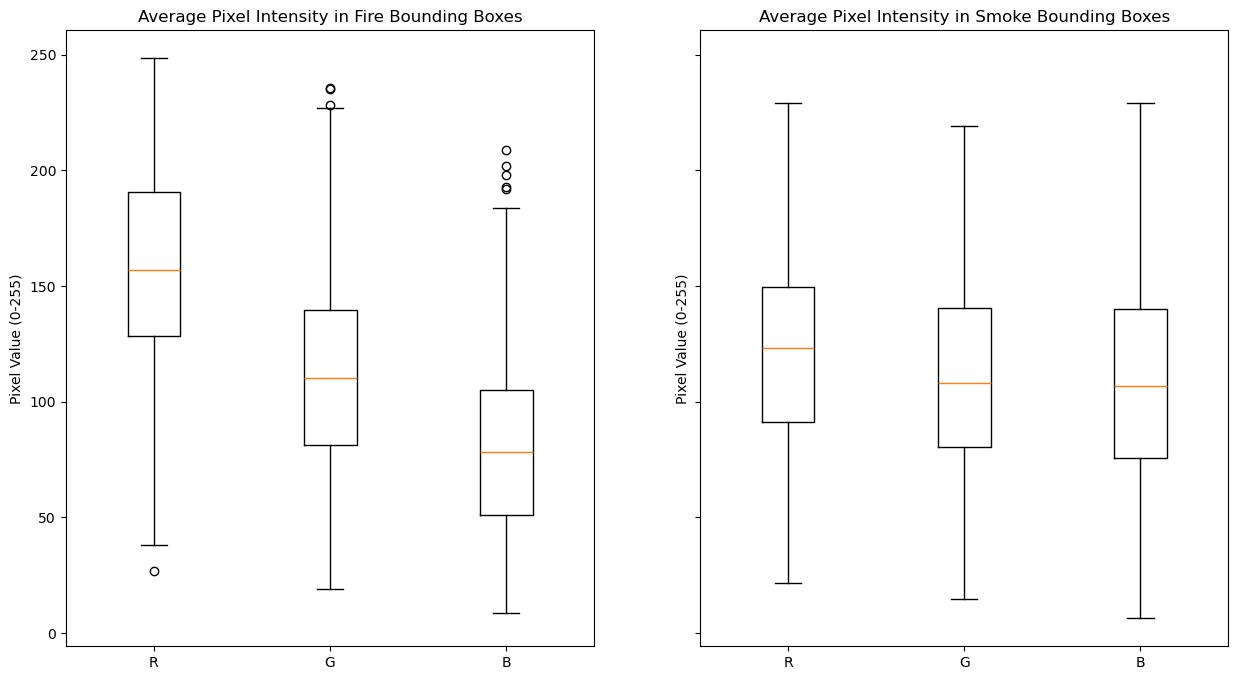

In [18]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set your paths
dataset_root = 'dataset/train'
image_folder = os.path.join(dataset_root, 'images')
label_folder = os.path.join(dataset_root, 'labels')

# Get a list of all label files
all_labels = [f for f in os.listdir(label_folder) if f.endswith('.txt')]

# Randomly sample 500 label files
sample_size = 500
if len(all_labels) > sample_size:
    sampled_labels = random.sample(all_labels, sample_size)
else:
    sampled_labels = all_labels

# Initialize lists to store average RGB values
fire_pixels = []
smoke_pixels = []

for label_file in sampled_labels:
    image_file = label_file.replace('.txt', '.jpg')
    image_path = os.path.join(image_folder, image_file)
    label_path = os.path.join(label_folder, label_file)

    try:
        image = cv2.imread(image_path)
        if image is None: continue
        h, w, _ = image.shape
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        with open(label_path, 'r') as f:
            for line in f.readlines():
                parts = line.split()
                class_id = int(parts[0])
                x_center, y_center, norm_w, norm_h = [float(p) for p in parts[1:5]]
                
                # Calculate pixel coordinates
                x_min = int((x_center - norm_w / 2) * w)
                y_min = int((y_center - norm_h / 2) * h)
                x_max = int((x_center + norm_w / 2) * w)
                y_max = int((y_center + norm_h / 2) * h)

                # Extract pixels within bounding box
                bbox_pixels = image_rgb[y_min:y_max, x_min:x_max]
                
                if bbox_pixels.size > 0:
                    avg_rgb = np.mean(bbox_pixels.reshape(-1, 3), axis=0)
                    if class_id == 0:
                        fire_pixels.append(avg_rgb)
                    elif class_id == 1:
                        smoke_pixels.append(avg_rgb)
    except Exception as e:
        print(f"Error processing {label_file}: {e}")
        continue

# Convert to numpy arrays
fire_pixels = np.array(fire_pixels)
smoke_pixels = np.array(smoke_pixels)

# Prepare data for box plots
fire_data_r = fire_pixels[:, 0]
fire_data_g = fire_pixels[:, 1]
fire_data_b = fire_pixels[:, 2]

smoke_data_r = smoke_pixels[:, 0]
smoke_data_g = smoke_pixels[:, 1]
smoke_data_b = smoke_pixels[:, 2]

# Create Box Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Fire Box Plots
data_fire = [fire_data_r, fire_data_g, fire_data_b]
ax1.boxplot(data_fire, labels=['R', 'G', 'B'])
ax1.set_title('Average Pixel Intensity in Fire Bounding Boxes')
ax1.set_ylabel('Pixel Value (0-255)')

# Smoke Box Plots
data_smoke = [smoke_data_r, smoke_data_g, smoke_data_b]
ax2.boxplot(data_smoke, labels=['R', 'G', 'B'])
ax2.set_title('Average Pixel Intensity in Smoke Bounding Boxes')
ax2.set_ylabel('Pixel Value (0-255)')


plt.show()

A box plot is a visualization that summarizes the statistical distribution of **a large set of data points**. 
It's designed to show **the minimum, first quartile (Q1), median, third quartile (Q3), and maximum values.**

**What the image shows?**

**The figure contains two side-by-side boxplots titled:**

Each boxplot compares three categories: R, G, and B (likely representing the red, green, and blue color channels within bounding boxes).
The y-axis in both plots is labeled “Pixel Value (0-255)”, indicating the intensity values range from 0 (dark) to 255 (bright).

**Interpreting each subplot**

**--Fire Bounding Boxes (left)**

**R channel:**
The box is centered around ~140–170 with a median orange line near ~160.
Whiskers extend from roughly ~50 to ~200–230, indicating a wide spread in intensities.

**G channel:**
Median around ~110–120.
A broader range with an upper out-of-range whisker approaching 230.

**B channel:**
Median around ~70–90.
The whiskers extend down to near 0 and up to ~180–210, showing substantial variability.
Overall note: Fire bounding boxes show substantial variation across color channels, with higher variability in R and G than B.

**--Smoke Bounding Boxes (right)**

**R channel:**
Median around ~120–130.
Whiskers span from ~40 to ~200, indicating wide variation.

**G channel:**
Median around ~100–110.
Similar broad spread as R with whiskers roughly 30–190.

**B channel:**
Median around ~110–120.

Upper whisker reaches near 210, lower whisker around ~30–40.

Overall note: Smoke bounding boxes also show substantial spread, but medians are typically around mid-range values (~100–130), suggesting different typical brightness compared to fire.

**Explore missing values, outliers, and data anomalies.**

**1. Missing Values (Corrupted or Unreadable Files)**

In an image dataset, a "missing value" is a file that is corrupted or cannot be read by your system. This can cause your data loader to crash during model training. 

**How to Check:**
Iterate through all your image files and attempt to read them using a library like OpenCV. If the read operation fails, or if the resulting image object is **None**, you've found a missing or corrupted file.

In [14]:
import os
import cv2

image_folder_path = 'dataset/train/images'
corrupted_files = []

for filename in os.listdir(image_folder_path):
    image_path = os.path.join(image_folder_path, filename)
    try:
        image = cv2.imread(image_path)
        if image is None:
            corrupted_files.append(filename)
    except Exception as e:
        corrupted_files.append(filename)
        
if corrupted_files:
    print(f"Found {len(corrupted_files)} corrupted files:")
    for f in corrupted_files:
        print(f)
else:
    print("No corrupted files found.")

No corrupted files found.


**2. Outliers**

Outliers in an image dataset are data points that are statistically unusual. They may not be errors, but they could be rare cases that confuse the model.

**How to Interpret Outliers in Your Box Plot?**

In a box plot, outliers are data points that fall a significant distance from the main body of the data. They are typically plotted as individual points or circles beyond the "whiskers" of the box plot.

**--Fire Bounding Boxes:**

**Red Channel (R):** There is one outlier shown for the Red channel. The data is contained one outlier within the whiskers.

**Green Channel (G):** You can see several outliers as small circles above the top whisker. These represent fire bounding boxes with an unusually high average green pixel intensity. This is an interesting anomaly, as fire is typically high in red and yellow. These could be from fires with a greenish hue (e.g., from burning copper) or from a scene with unusual lighting.

**Blue Channel (B):** There are multiple outliers shown above the top whisker. These represent fire bounding boxes with an unusually high average blue pixel intensity. This is also unexpected for typical fires and could indicate a fire burning in a scene with strong blue light or reflections, or perhaps a mislabeled image.

**--Smoke Bounding Boxes:**

**Red, Green, and Blue Channels:** In the smoke box plot, there are no visible outliers in any of the three color channels. The data distribution for average pixel intensity in smoke is contained within the whiskers, indicating a more consistent color profile across the sample.

**How to handle outliers in dataset?**

-->Identify the image files that correspond to these outlier data points.

-->Visually inspect these specific images to understand the real-world reason for the unusual color values. This will help you determine if they are valid but rare examples or if they are data anomalies that should be cleaned from the dataset.

**3. Data Anomalies**

Data anomalies are images or annotations that are simply incorrect. These are often the most damaging to a model's performance and require a human eye to detect.
Anomalies are typically identified through a combination of statistical analysis and visual inspection. 

The potential anomalies based on the outliers you found in your box plot, and then visually inspect them.

**How to Explore:**

**-->Mislabeled Images:** The most common anomaly is an image labeled fire that contains no fire, or vice versa. The only reliable way to find these is to manually inspect a random sample of images from each class.

**-->Incorrect Annotations:** This includes misplaced, oversized, or missing bounding boxes. For example, an image with a tiny, correctly labeled fire but a massive bounding box that covers the entire image is an anomaly.

**-->Unusual Visuals:** Look for images with extremely poor quality (blurry, dark, overexposed) or those that contain elements that don't belong in the dataset (e.g., a hand holding the camera, a watermarked image).

# 2. Apply Feature Engineering Techniques

This is where you'll transform the raw data into a format that your machine learning model can learn from more effectively.

For an image-based project, feature engineering isn't about creating new columns in a table. Instead, it's about processing the images and annotations to highlight the most important information for the model.

**1. Handle missing values**

**-->Handle missing values** no missing values in my dataset(No corrupted files found)

**2. Handling Outliers**

Outliers are data points that are statistically unusual but may still be valid. For example, a fire that is extremely large or a smoke plume that is unusually shaped.

**Option 1: Keep them.** If the outliers represent rare but valid real-world scenarios (e.g., a massive wildfire), it's often best to keep them. Keeping them helps your model become more robust and generalize better to real-world edge cases. Removing them might make the model brittle.

Conclusion: ---->Due to the nature of my project, the best approach is to keep the outliers but be aware of them.

**Option 2: Cap or transform.** If an outlier is an extreme value that could skew your model (e.g., a bounding box with a large aspect ratio), you could consider capping its values. This is more common in tabular data but can be applied to derived features. For a deep learning model, simply keeping the image and letting the model handle it is usually a better approach.


**2. Handling Anomalies**

Anomalies are data points that are simply incorrect and can harm your model's performance. The most common anomalies are mislabeled images or incorrect bounding boxes.

**Option 1: Removal.** The most effective way to handle anomalies is to manually remove them from your dataset. A mislabeled image (e.g., a sunset labeled as 'fire') will teach your model the wrong thing, leading to incorrect predictions.

**Option 2: Re-labeling.** If an image is mislabeled, but the content is good (e.g., a fire image labeled 'smoke'), you should re-label it correctly. This turns a bad data point into a valuable one.

Conclusion---> My dataset images are correctly labeled and have good annotations. No corrupted or unreadable image files were found, indicating a clean dataset with no missing values

**Perform data transformation**

It involves modifying your images and their corresponding annotations to create a standardized format that a deep learning model can effectively learn from.

**--->One-Hot Encoding**

One-hot encoding creates new binary columns, one for each unique category in a feature. For a given data point, a **1** is placed in the column corresponding to its category, and **0**s are placed in all other new columns. This method is ideal when there is no inherent order between the categories.

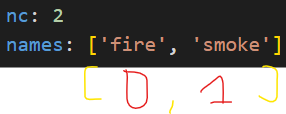

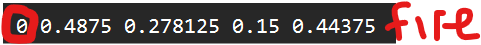

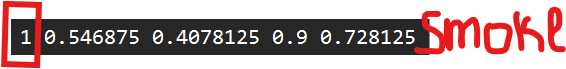

**Apply feature extraction if relevant**

In this project, feature extraction was a crucial process, but it was performed automatically by the deep learning model rather than through manual engineering. The **YOLOv8 model**, a state-of-the-art **Convolutional Neural Network (CNN)** chosen for its efficiency in real-time object detection, learned to identify a hierarchy of features directly from the raw pixel data.

The model's initial layers learn simple features like edges, while deeper layers learn complex features such as flame shape and smoke texture.

 # 3. Build and Deploy a Machine Learning Model

**1. Model Choice:**

**A Convolutional Neural Network (CNN)** was selected for its ability to process spatial data. Specifically, I used YOLOv8 due to its reputation as a leading model for real-time object detection, which is a critical requirement for a live factory setting. The model's "single-shot" architecture allows for rapid, accurate predictions.

**2. Model Training and Evaluation**

**Model training** 

**----->>Path on how i trained my model** "ML Assignment/Train custom fire dataset.ipynb" **inside this folder**

**Evaluation of model**

In the context of object detection of YOLOv8 model, evaluating **"accuracy"** is best done by focusing on three key metrics: **Precision, Recall, and mAP (Mean Average Precision).**

In [54]:
from ultralytics import YOLO

# Load your model
model = YOLO("fire.pt")

# Run validation using the CPU
metrics = model.val(data="data.yaml", imgsz=640, batch=16, conf=0.25, iou=0.6, device="cpu")

Ultralytics 8.3.202  Python-3.11.13 torch-2.8.0+cpu CPU (12th Gen Intel Core(TM) i7-1255U)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.40.3 ms, read: 40.317.6 MB/s, size: 27.9 KB)
val: Scanning C:\Users\user\Desktop\ML Assignment\dataset\valid\labels.cache... 363 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 363/363 160.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 23/23 0.3it/s 1:253.5sss
                   all        363        896      0.607      0.541      0.593      0.321
                  fire        358        673      0.665      0.633      0.684      0.391
                 smoke        147        223      0.549      0.448      0.502      0.251
Speed: 3.7ms preprocess, 196.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to C:\Users\user\Desktop\ML Assignment\runs\detect\val12


**----------------Overall Performance----------------**

The model has an overall **Mean Average Precision (mAP) of 0.59** at an IoU threshold of 50% (mAP50). This indicates your model is performing reasonably well at both identifying and locating objects.

The overall mAP for a range of IoU thresholds (50-95) is 0.321, which suggests the model's bounding box predictions are not always highly accurate.

**----------------Class-Specific Analysis-----------**

The model's performance varies significantly between the **fire** and **smoke** classes.

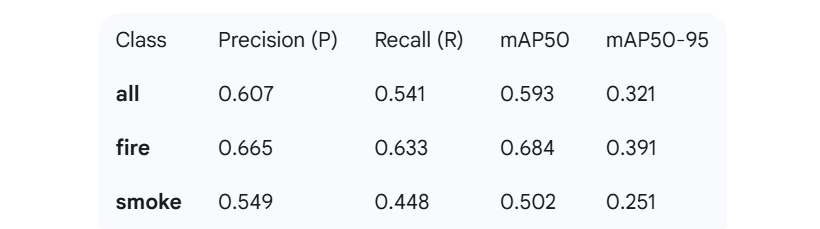

**Fire Class Performance:** The model performs much better at detecting 'fire'. It has **a high Precision of 0.665 and a strong Recall of 0.633**. This means that when the model predicts a fire, it is usually correct (66.5% of the time), and it successfully detects a good portion of the actual fires present in the images (63.3% of the time). Given the safety-critical nature of the project, the high recall for this class is a significant positive result.

**Smoke Class Performance:** The model's performance for 'smoke' is noticeably weaker. **The Recall for smoke is only 0.448,** which is a concern. This means the model is missing a significant number of actual smoke instances. The lower performance is likely a direct consequence of the class imbalance identified in your initial EDA, as the model had fewer examples of 'smoke' to learn from during training.

__________**F1-score**____

The F1-score is a single metric that balances both Precision and Recall. It's the harmonic mean of these two values, providing a more balanced measure of a model's performance, especially in cases of class imbalance.

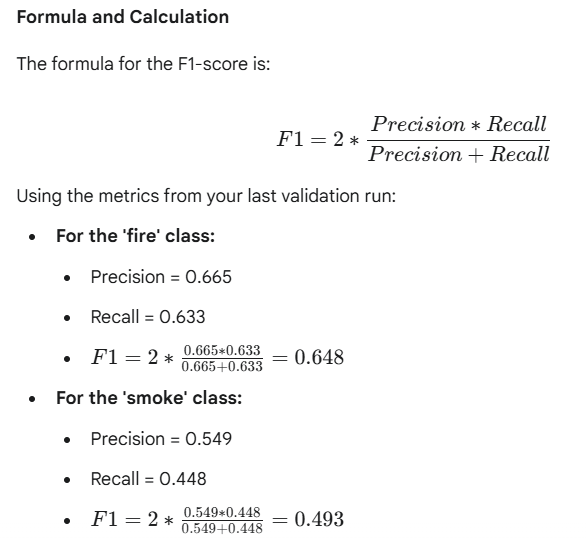

**---Confusion Matrix---**

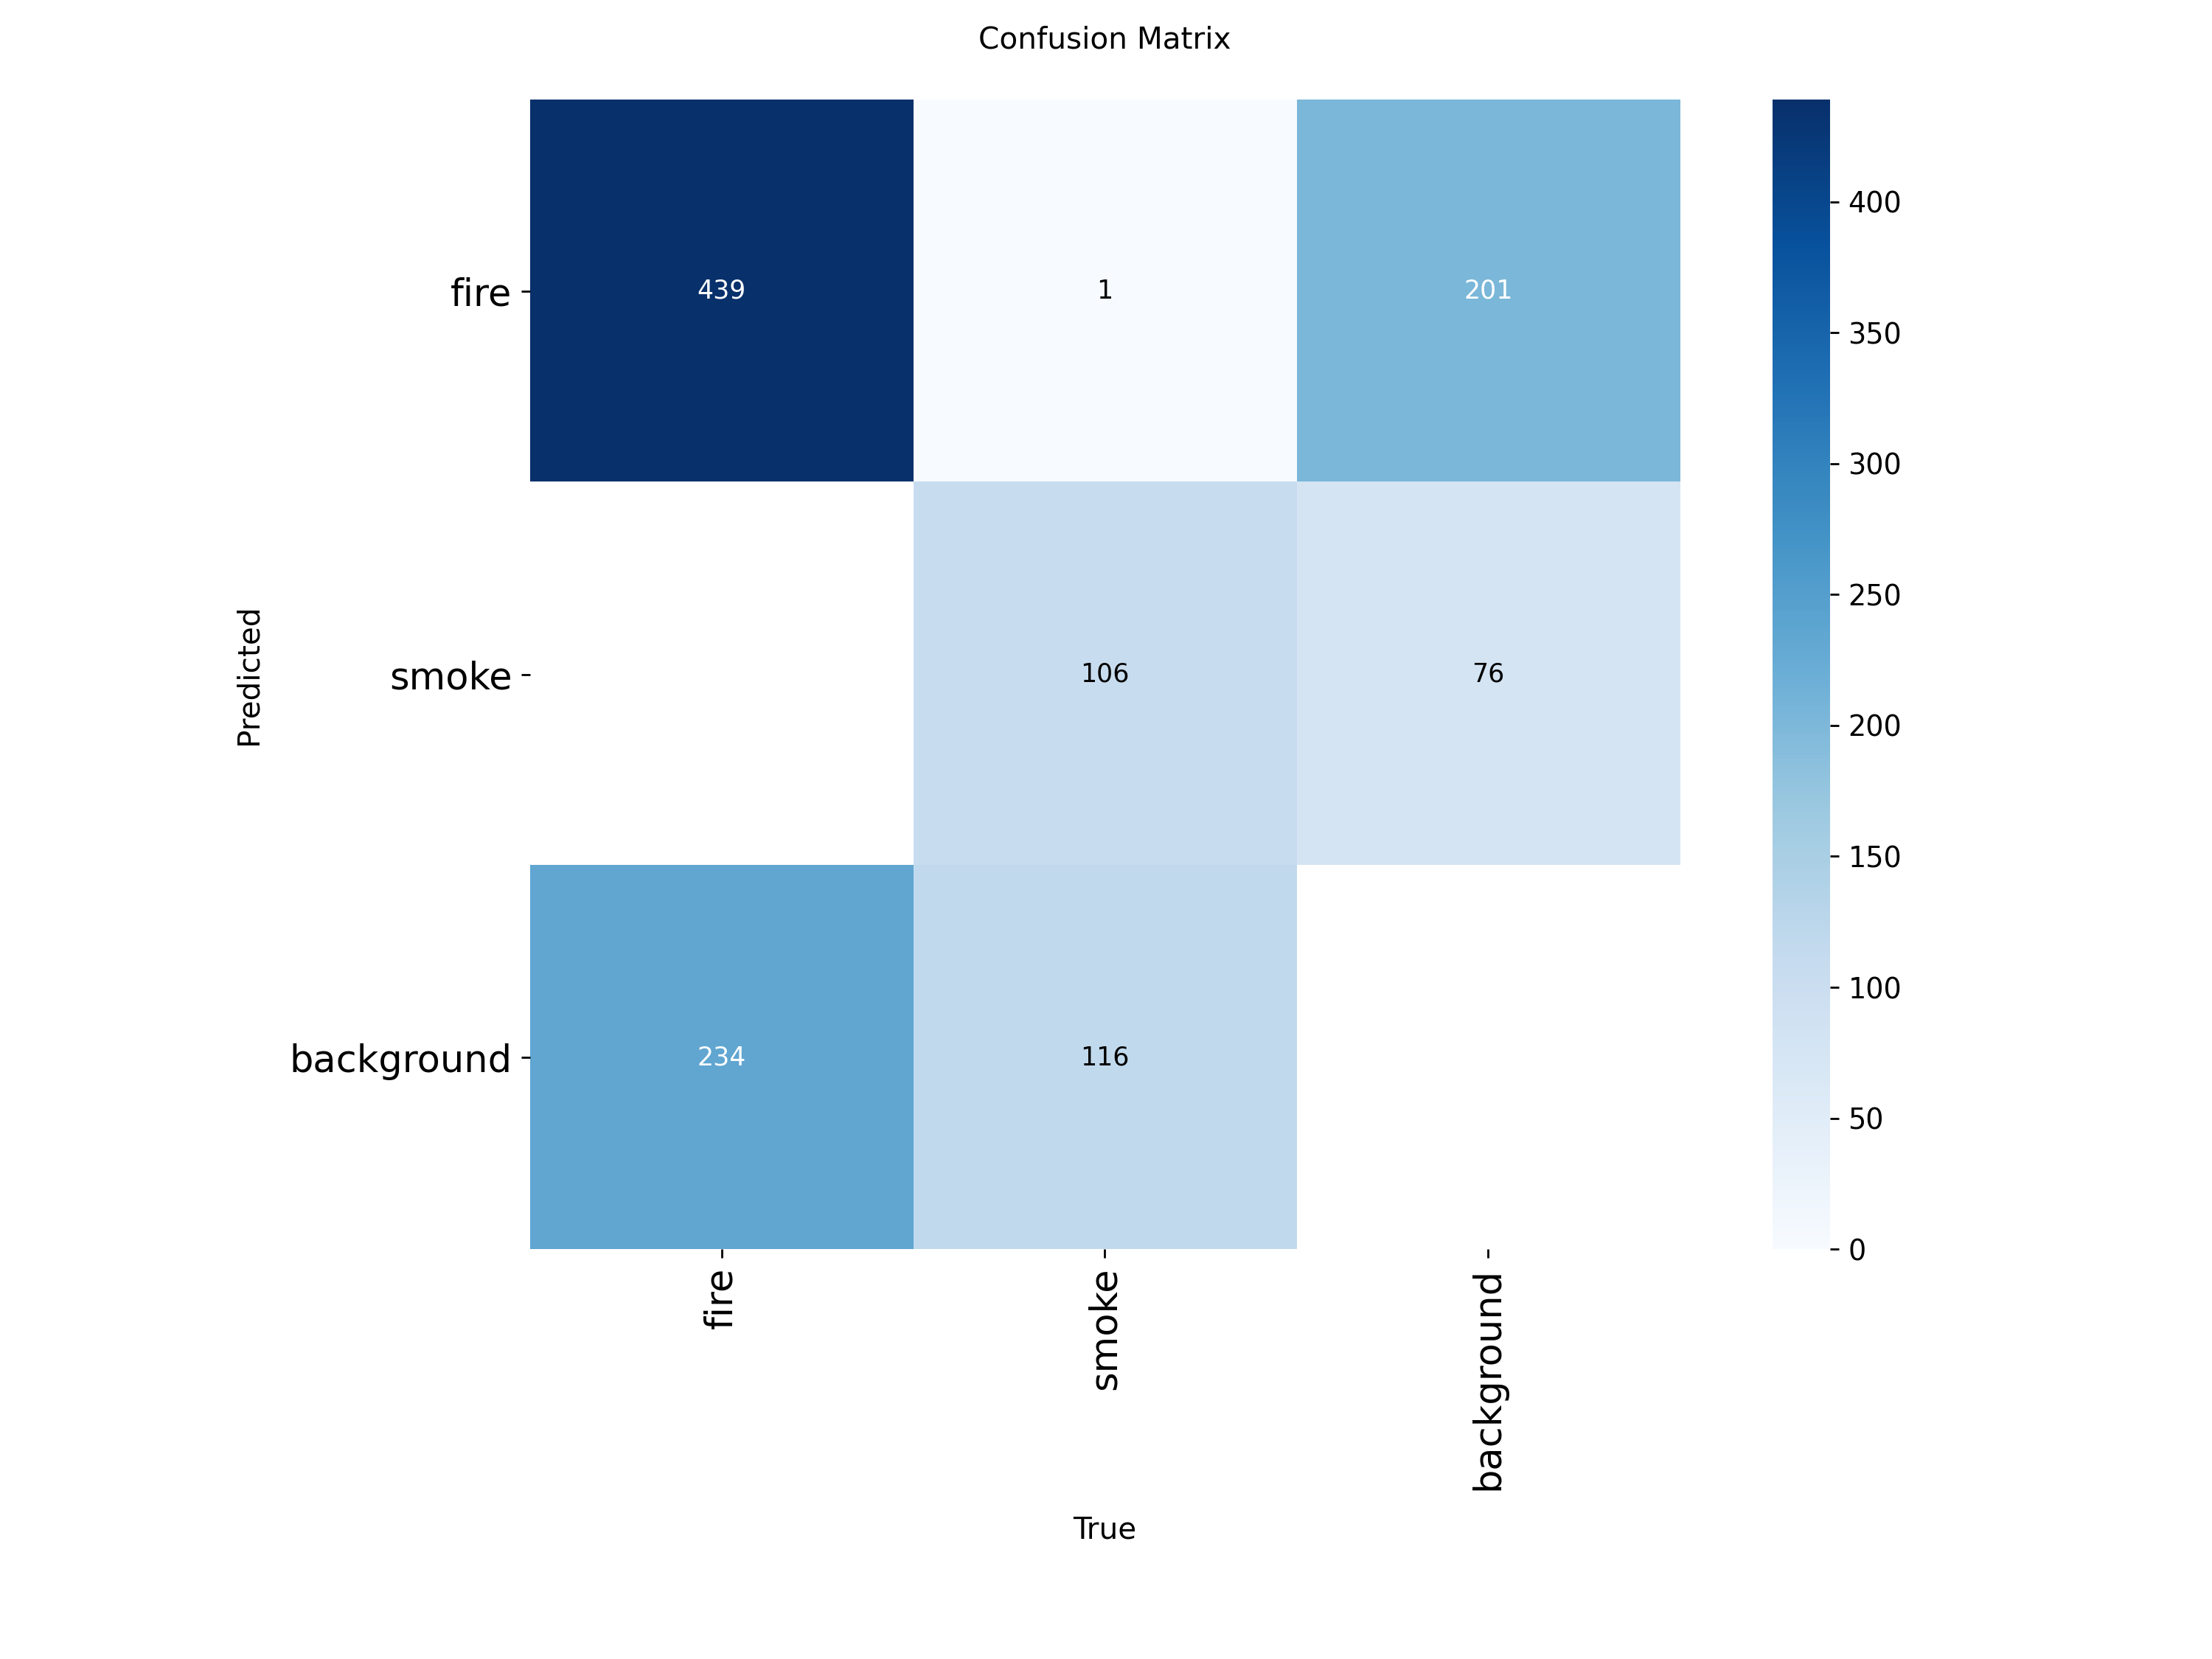

In [7]:
from IPython.display import Image
Image(filename="runs/detect/val/confusion_matrix.png")

**Analysis on confusion_matrix**

**1. Reading the Matrix**

Rows = Predicted labels

Columns = True labels

**2. Per-Class Performance**

**---Class: Fire (True Fire)---**

Correctly predicted as fire: **439**

Misclassified as smoke: **1**

Misclassified as background: **234**

**Observation:** Fire is often confused with background, but mostly predicted correctly.

**---Class: Smoke (True Smoke)---**

Correctly predicted as smoke: **107**

Misclassified as fire: **1**

Misclassified as background: **115**

**Observation:** Smoke is the hardest class. Nearly as many smoke samples are misclassified as background as are predicted correctly.

**---F1-Confidence Curve---**

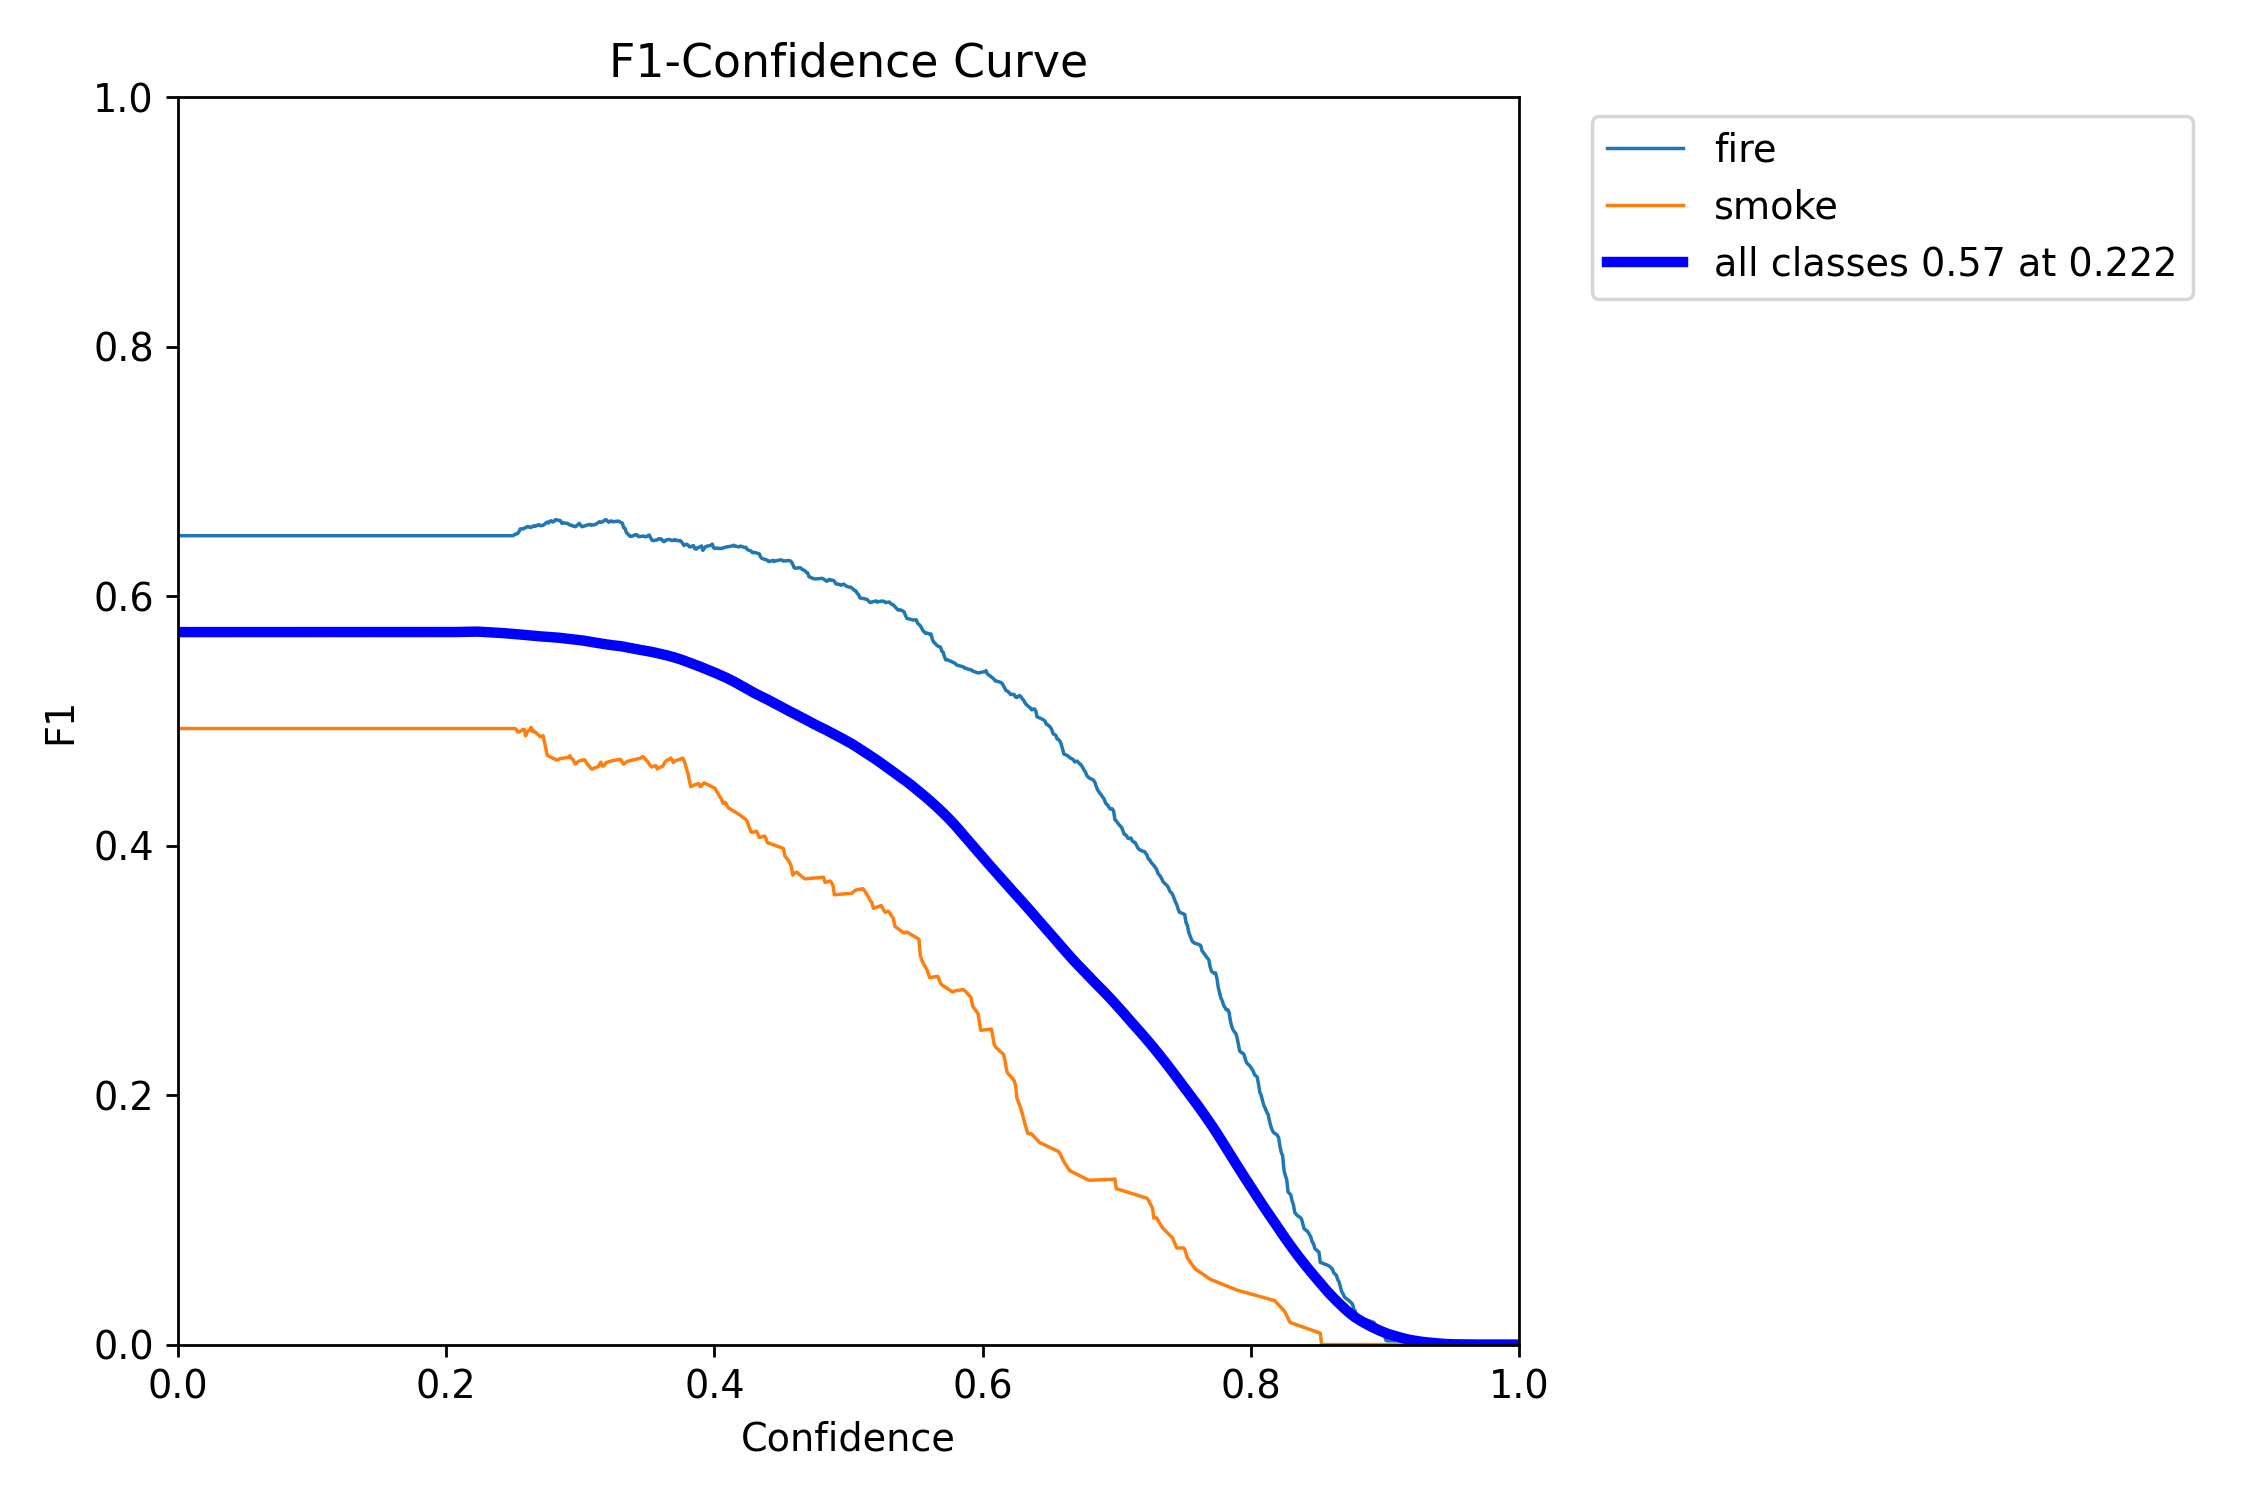

In [8]:
from IPython.display import Image
Image(filename="runs/detect/val/BoxF1_curve.png")

**F1-Confidence Curve Analysis**

Fire: ~0.65 F1 at low confidence, decreases gradually → stable detection.

Smoke: ~0.47 F1, drops sharply → weak detection.

Overall: Best F1 = 0.57 at confidence 0.22 (optimal threshold).

Conclusion: Fire is detected more reliably than smoke. Higher thresholds reduce detections, especially for smoke.

**---Precision-Confidence Curve---**

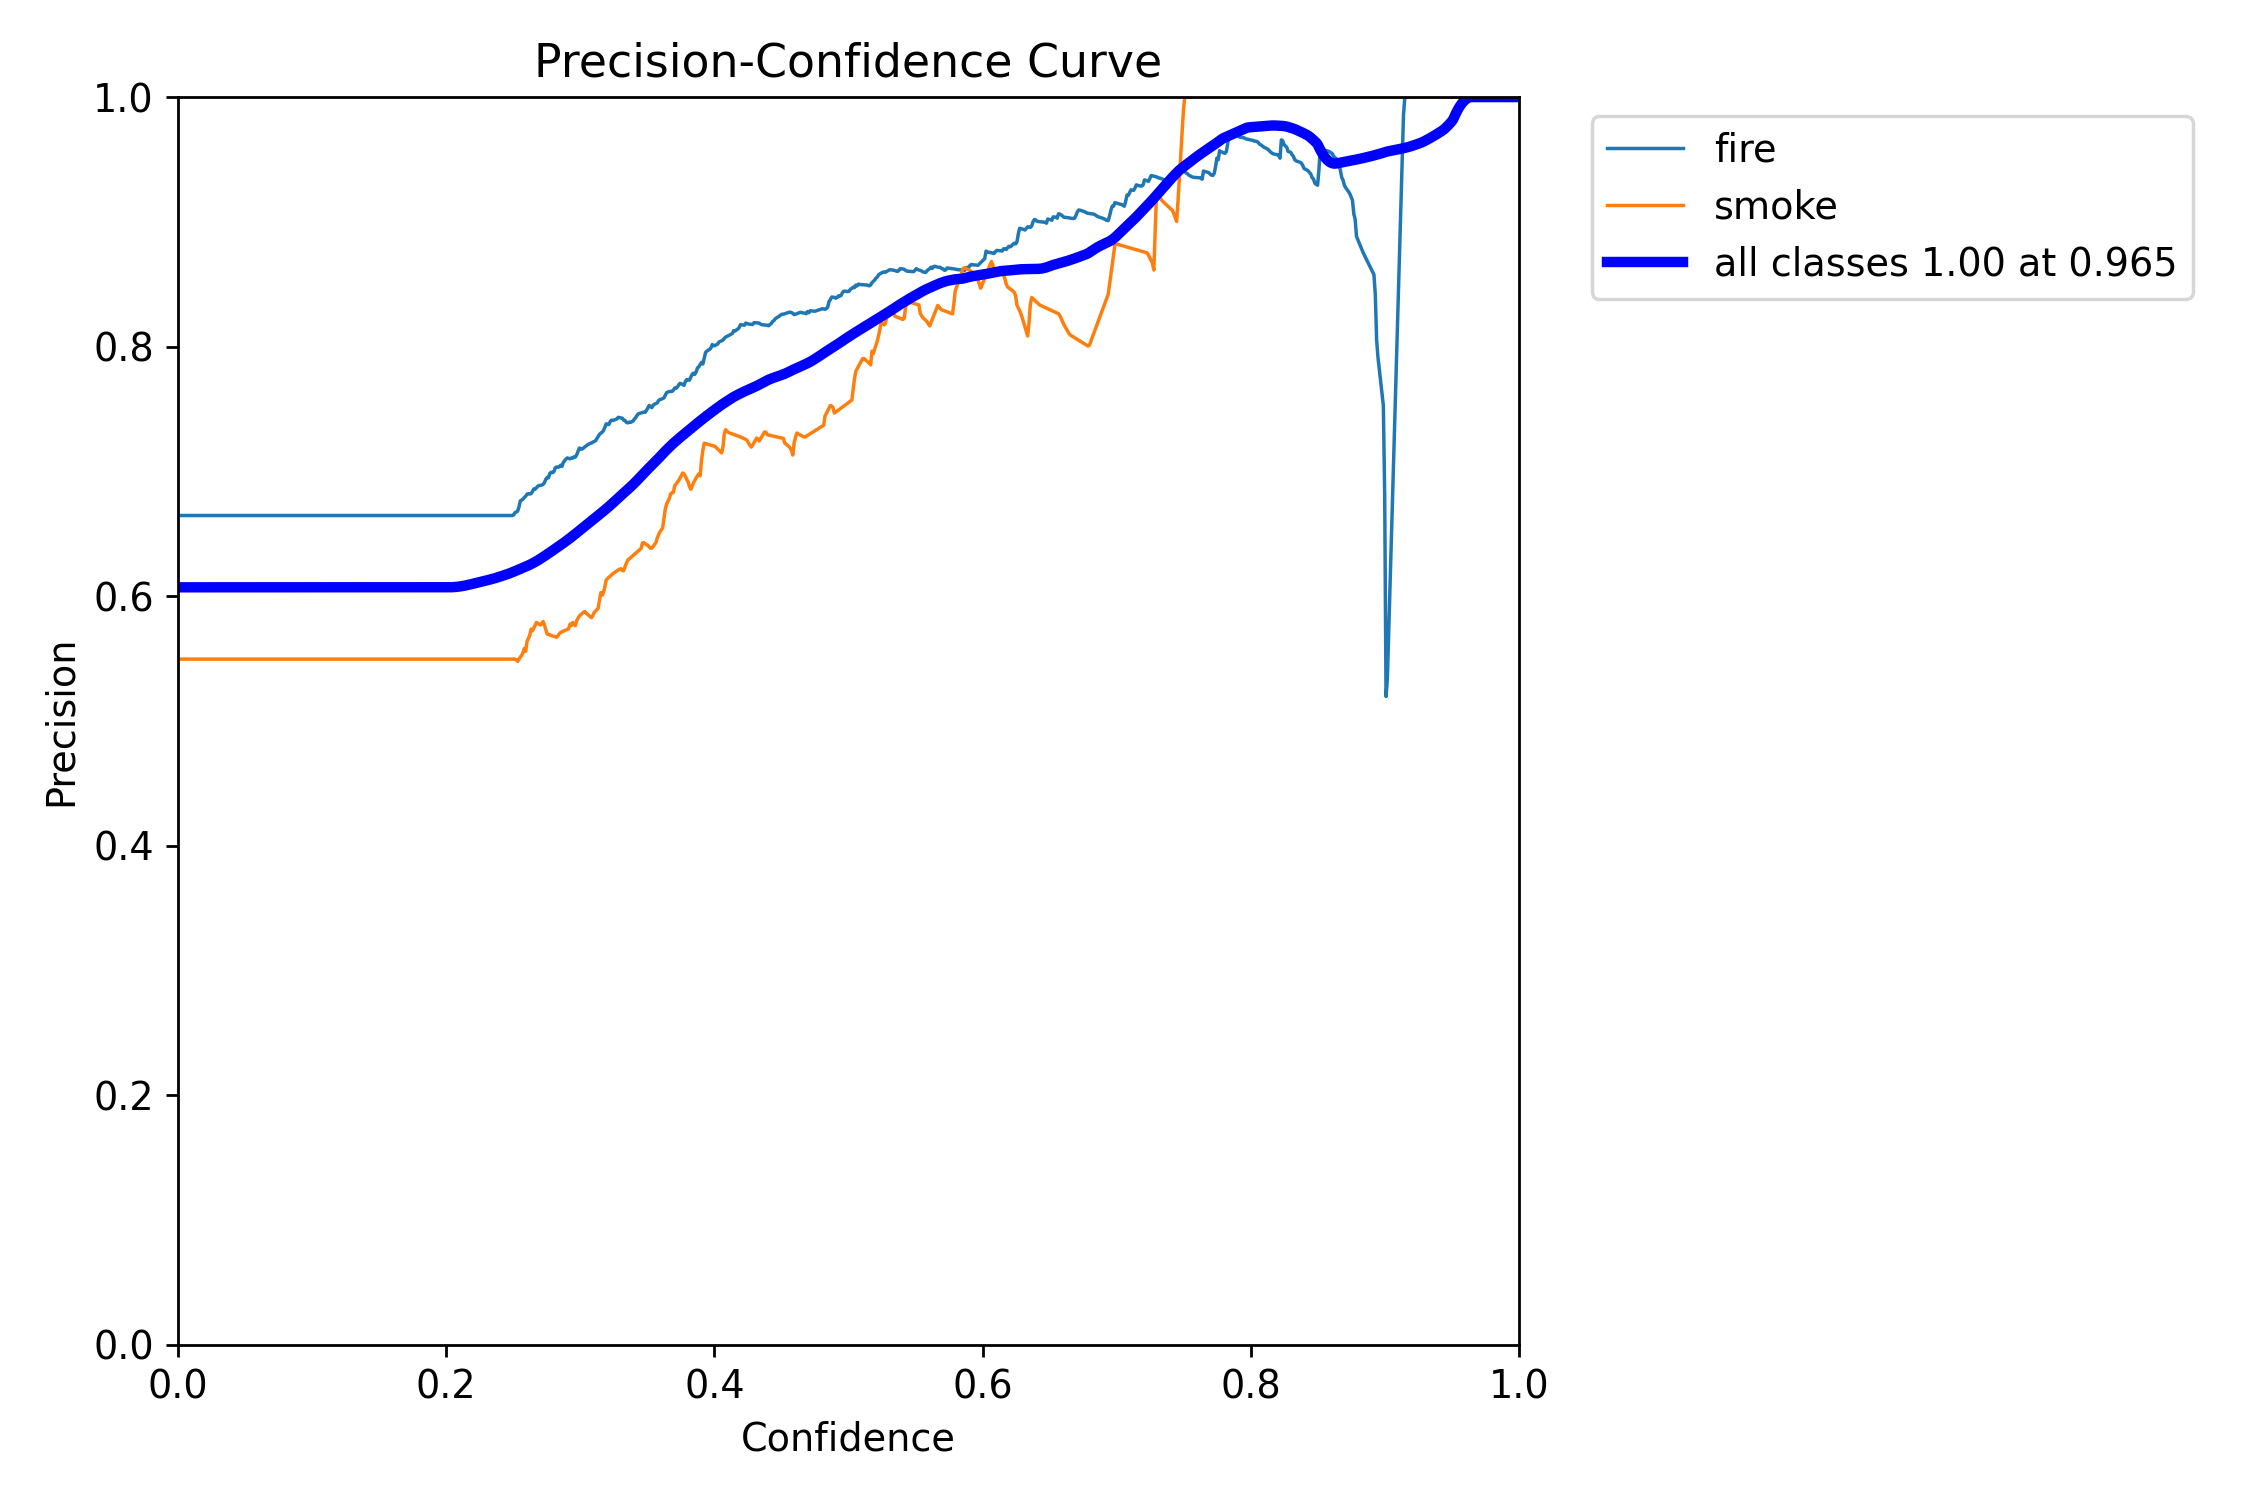

In [9]:
from IPython.display import Image
Image(filename="runs/detect/val/BoxP_curve.png")

**Analysis on Precision-Confidence Curve**

This curve illustrates how the precision of your model changes as the confidence threshold is adjusted. The plot shows that both 'fire' and 'smoke' have a relatively stable precision up to a confidence of about 0.7. Beyond this, the precision for 'smoke' drops off more quickly, indicating that the model is less confident in its smoke detections.

**---Precision-Recall Curve---**

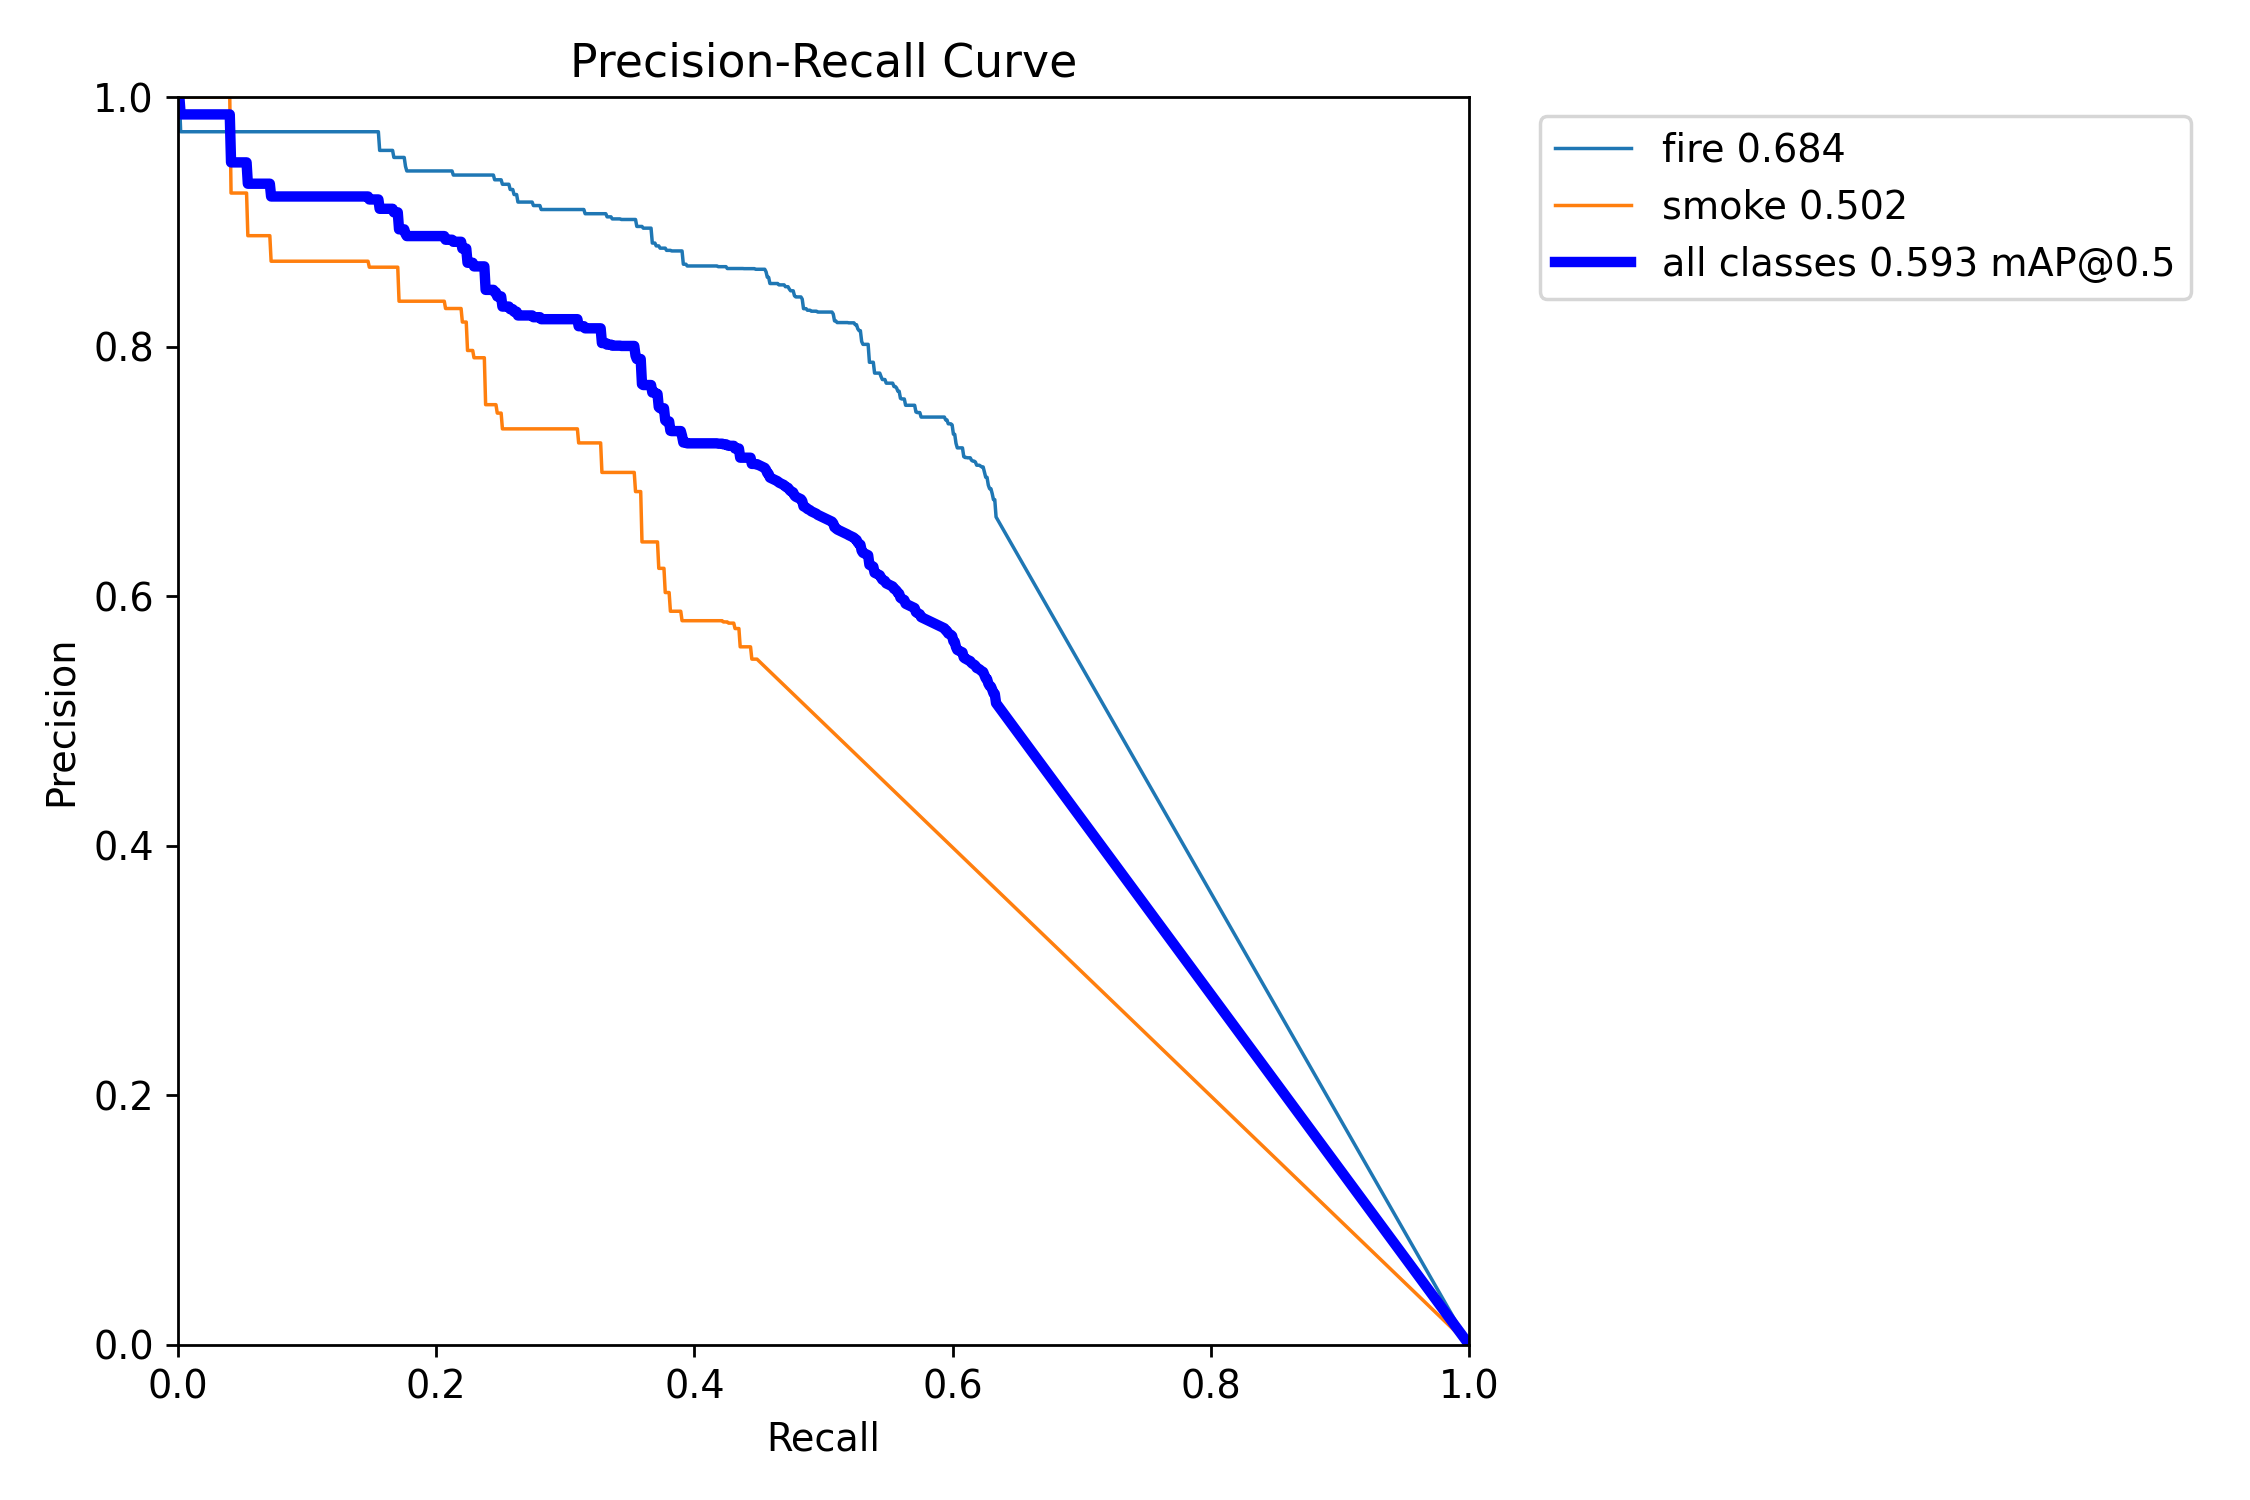

In [10]:
from IPython.display import Image
Image(filename="runs/detect/val/BoxPR_curve.png")

**Analysis on Precision-Recall Curve**

The Precision-Recall Curve shows the trade-off between precision and recall for your model. The blue line for 'fire' stays higher on the graph than the orange line for 'smoke,' confirming that your model is more robust at detecting fire.

**---Recall-Confidence---**

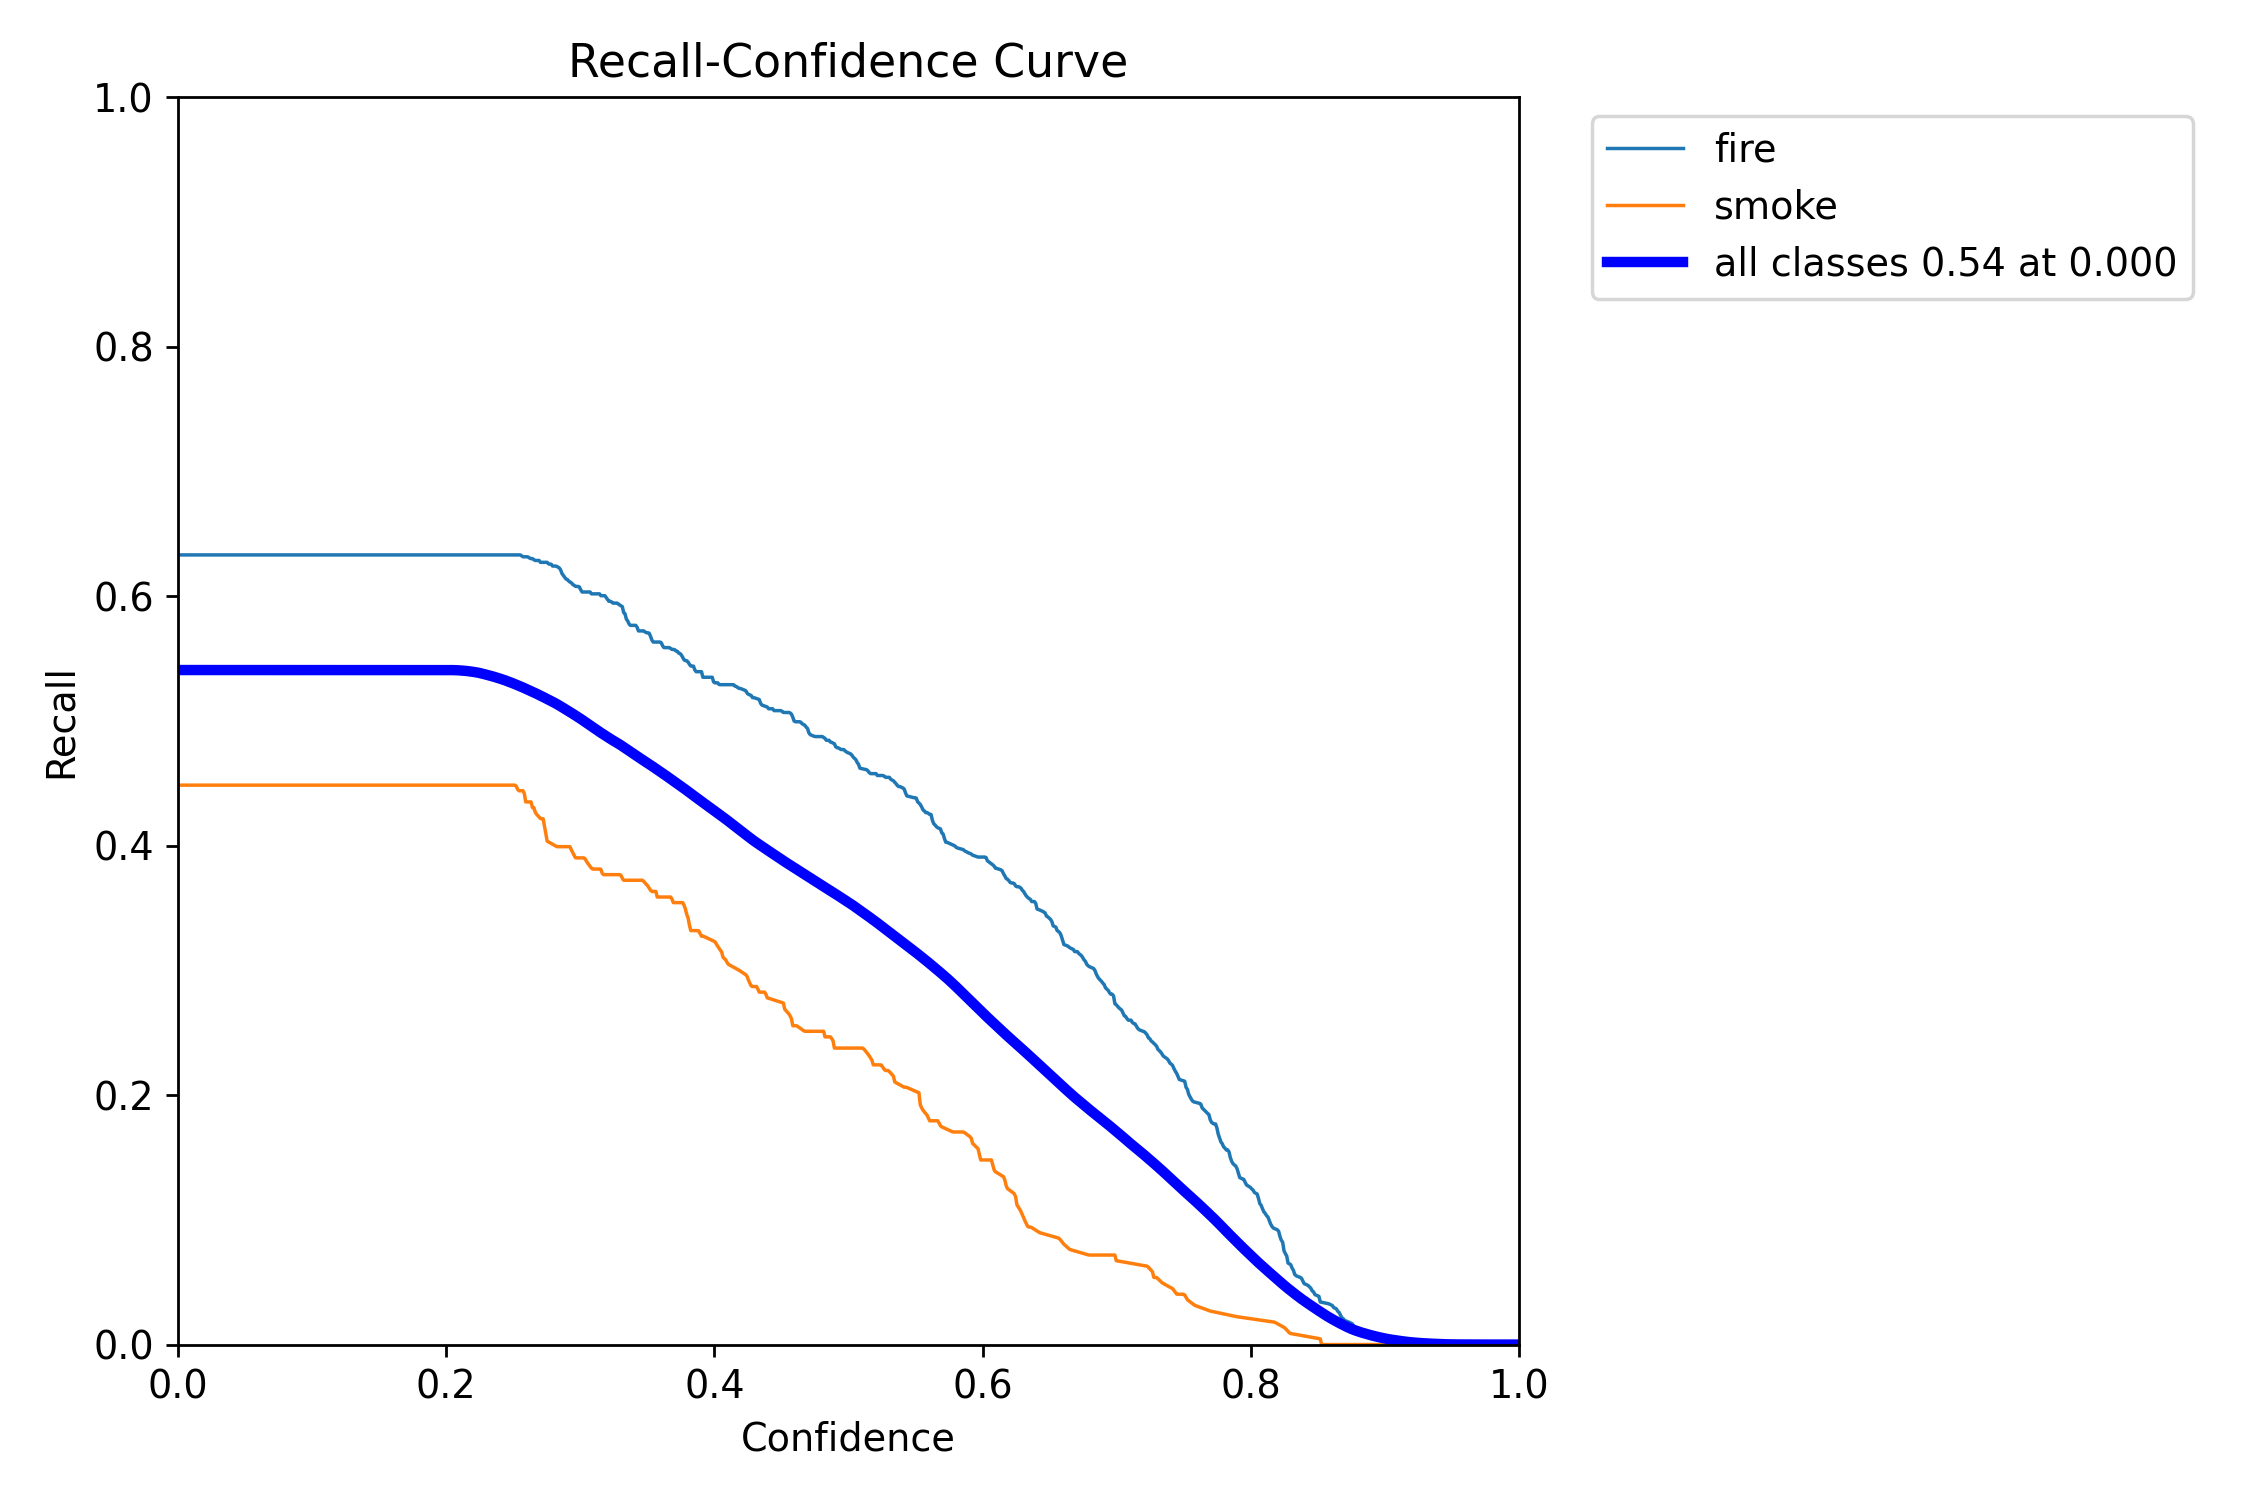

In [12]:
from IPython.display import Image
Image(filename="runs/detect/val/BoxR_curve.png")

**Recall-Confidence Analysis**

Fire: Recall ~0.63 at low confidence, decreases gradually as threshold rises.

Smoke: Recall ~0.45, drops steeply → often missed at higher thresholds.

Overall: Max recall ~0.54 at confidence 0.0, declines with stricter thresholds.

Conclusion: Fire recall is stronger than smoke. Low thresholds improve detection (higher recall), while high thresholds cause many missed cases, especially for smoke.

**---The Labels evaluation---**

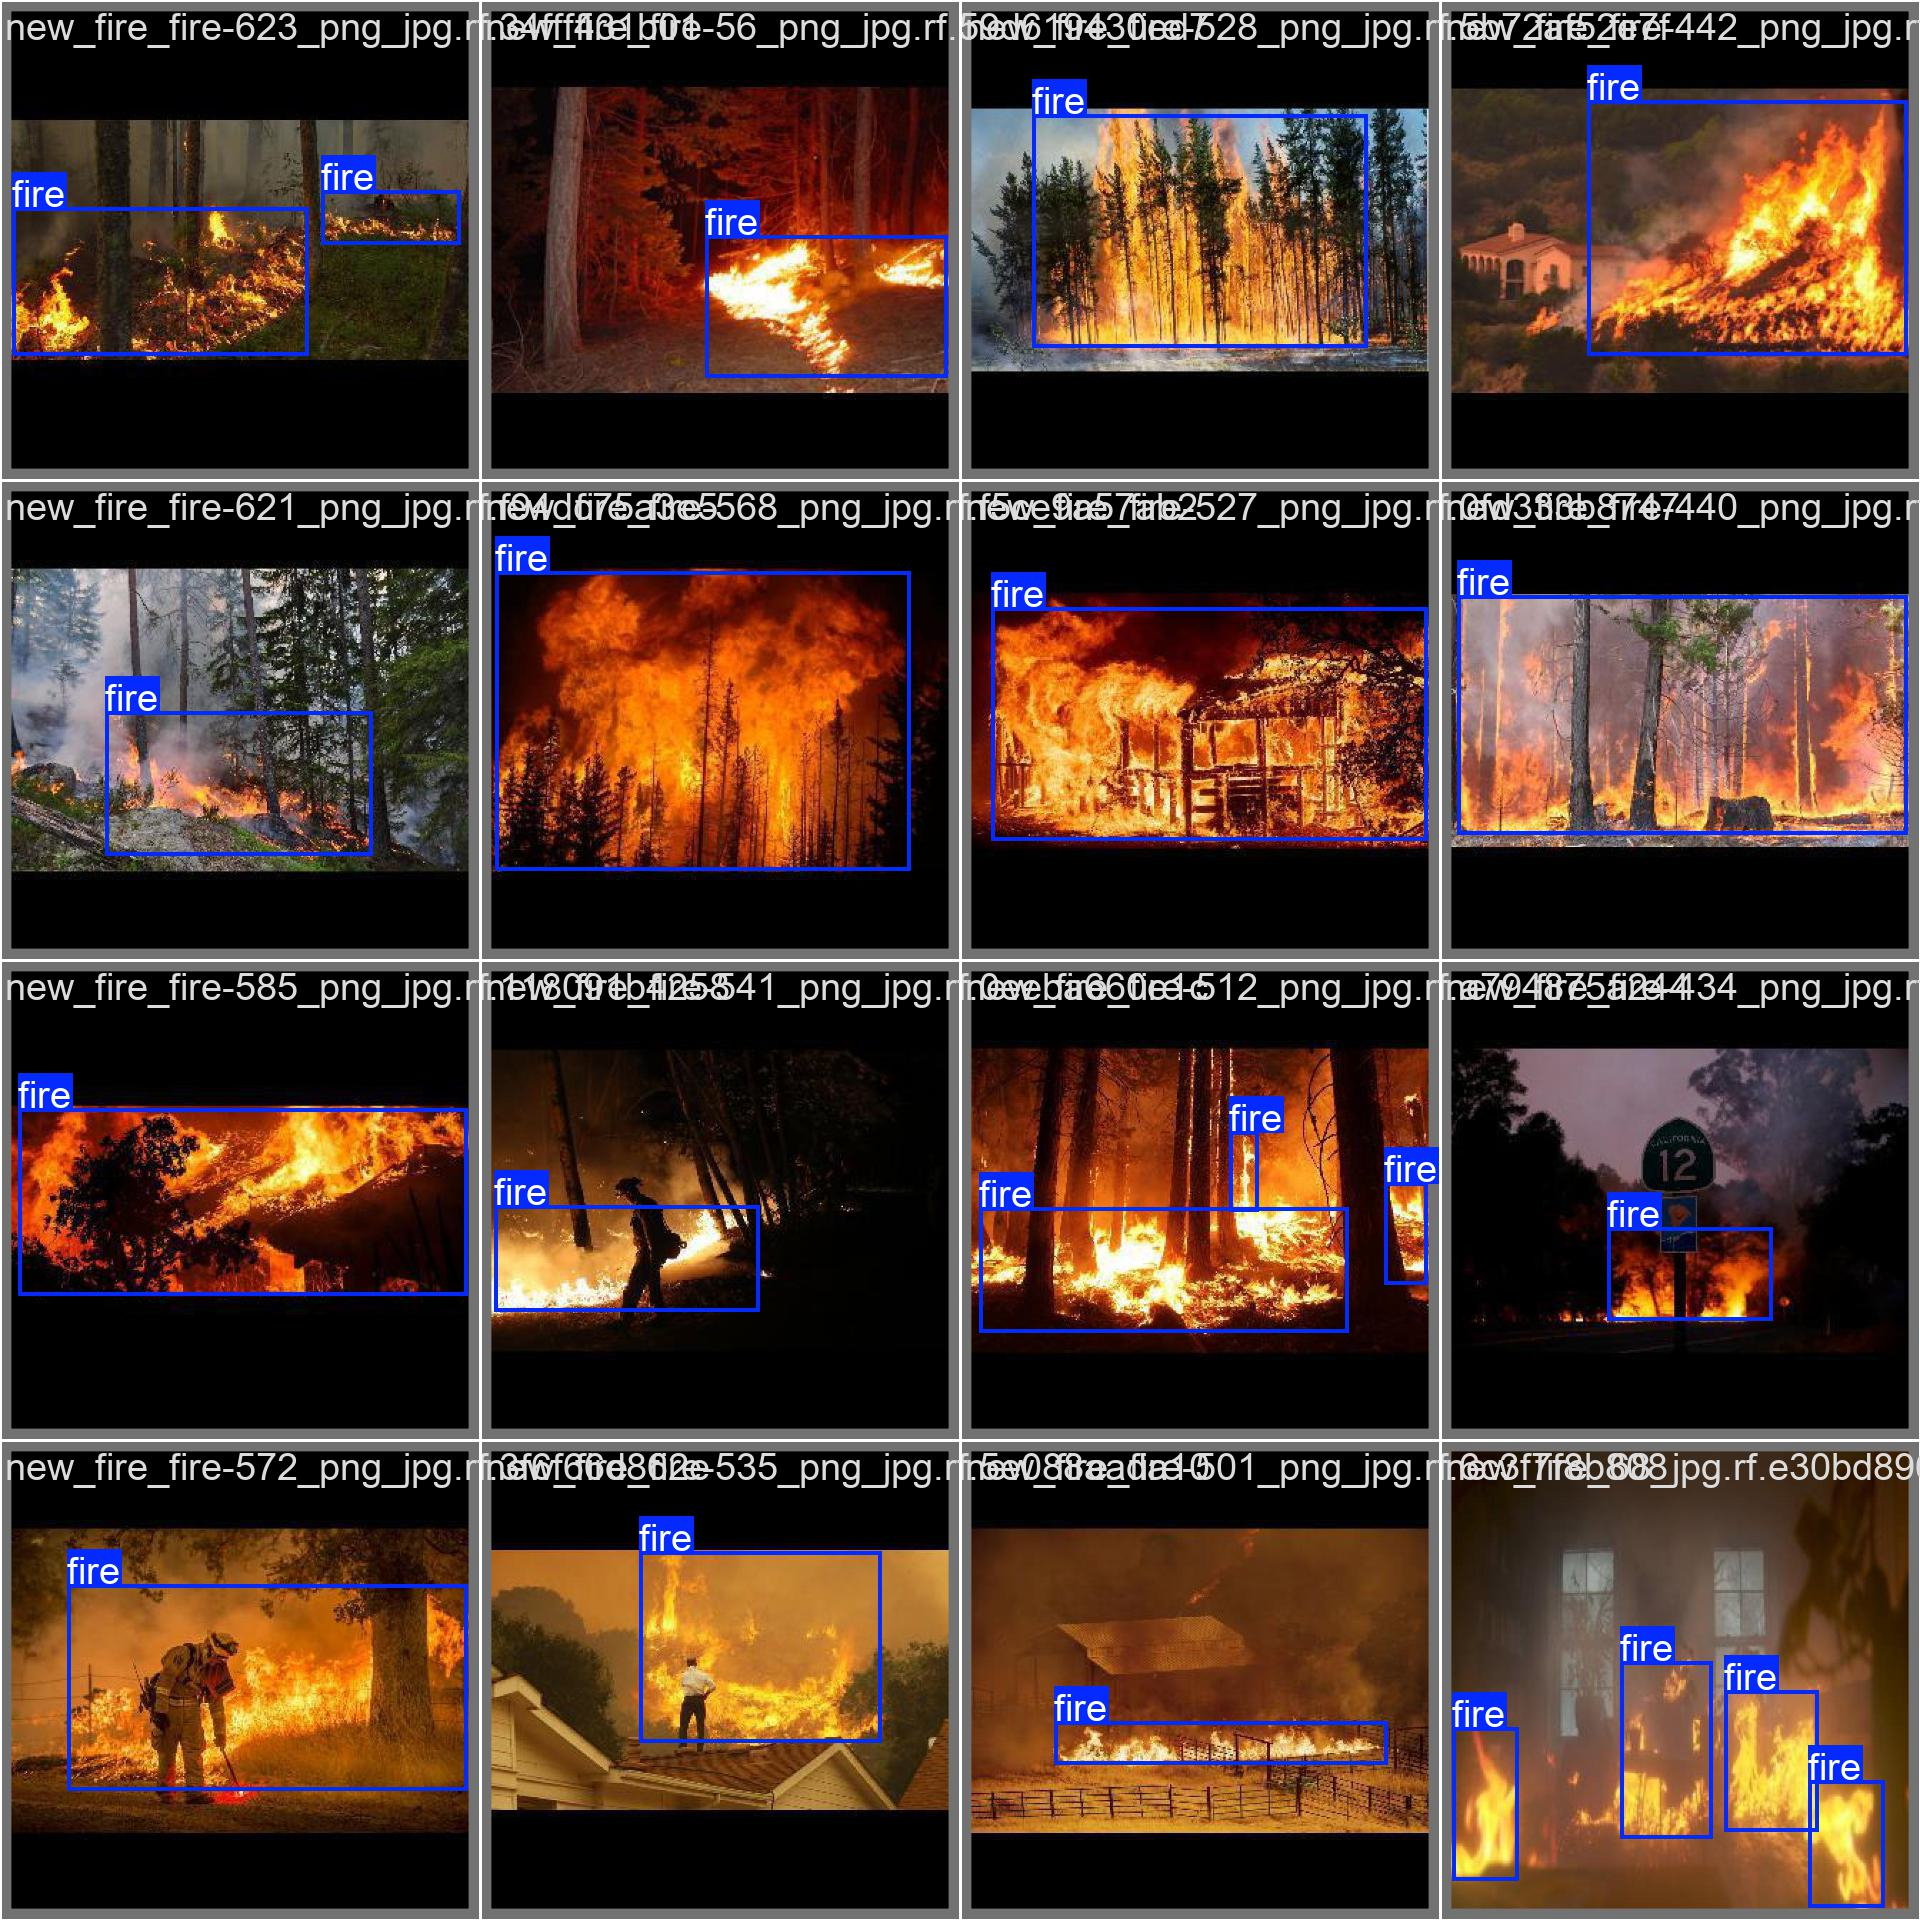

In [21]:
from IPython.display import Image
Image(filename="runs/detect/val/val_batch0_labels.jpg")

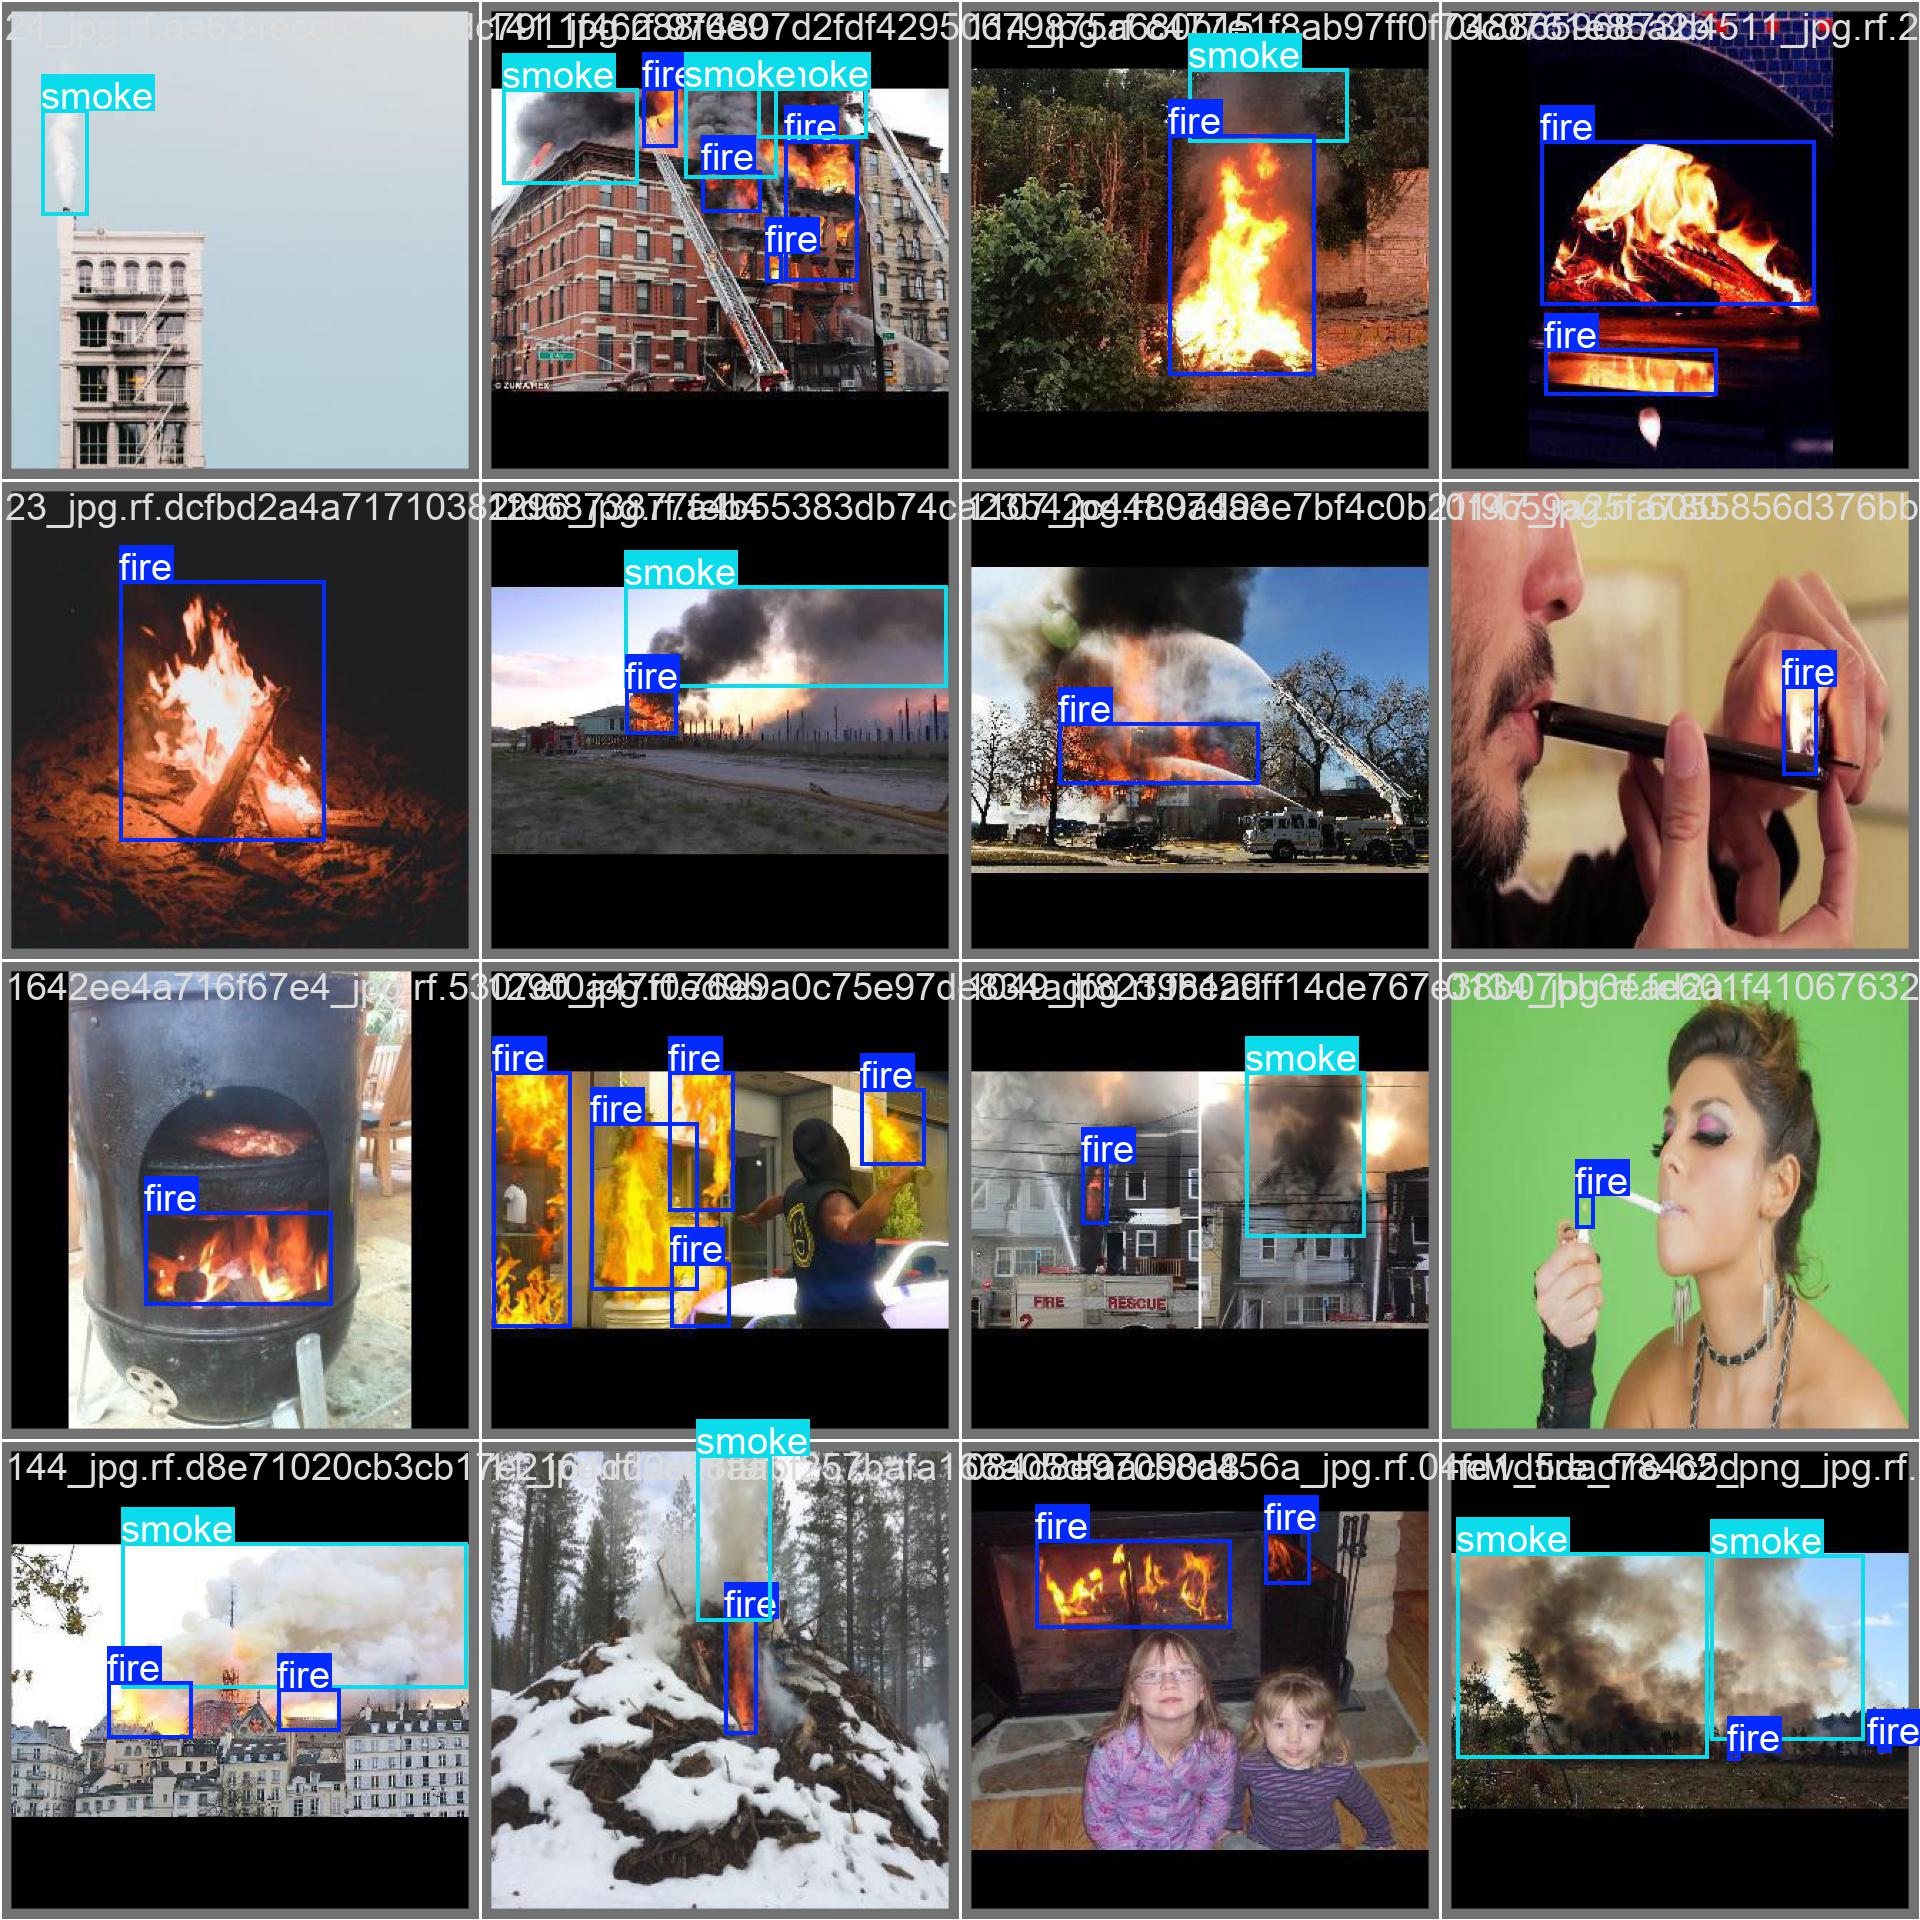

In [15]:
from IPython.display import Image
Image(filename="runs/detect/val/val_batch1_labels.jpg")

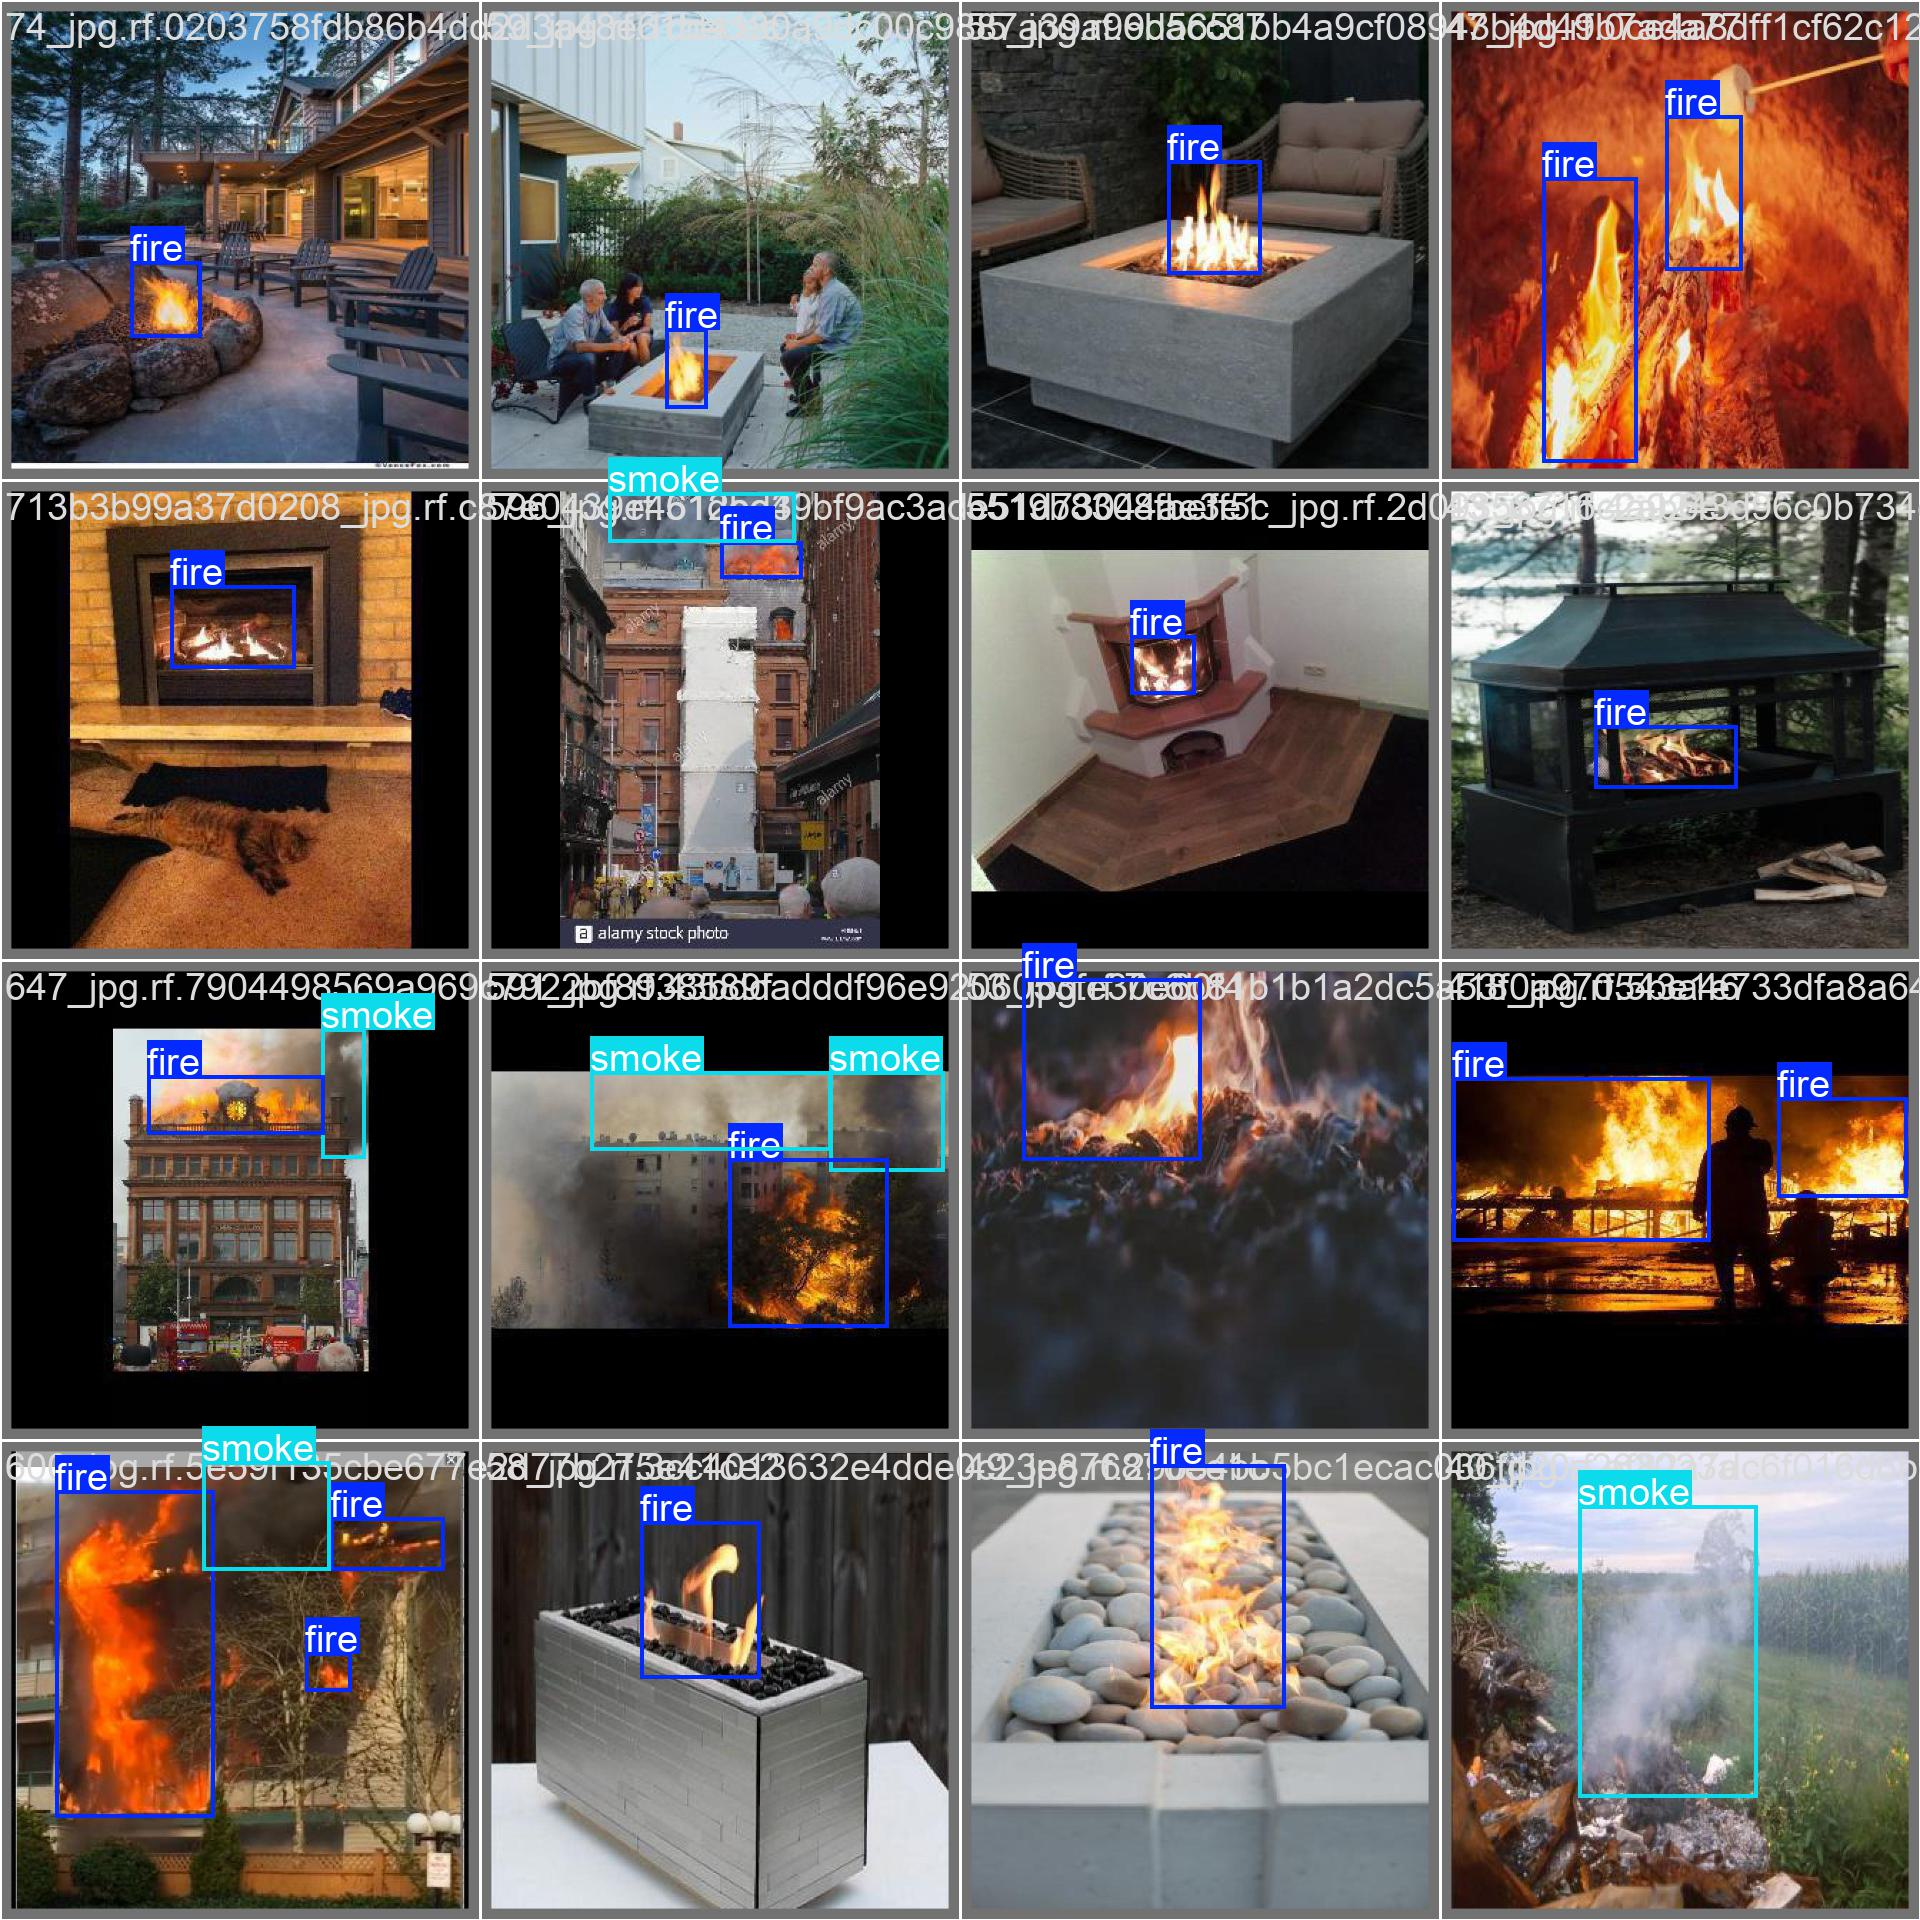

In [16]:
from IPython.display import Image
Image(filename="runs/detect/val/val_batch2_labels.jpg")

**---The Prediction Evaluation---**

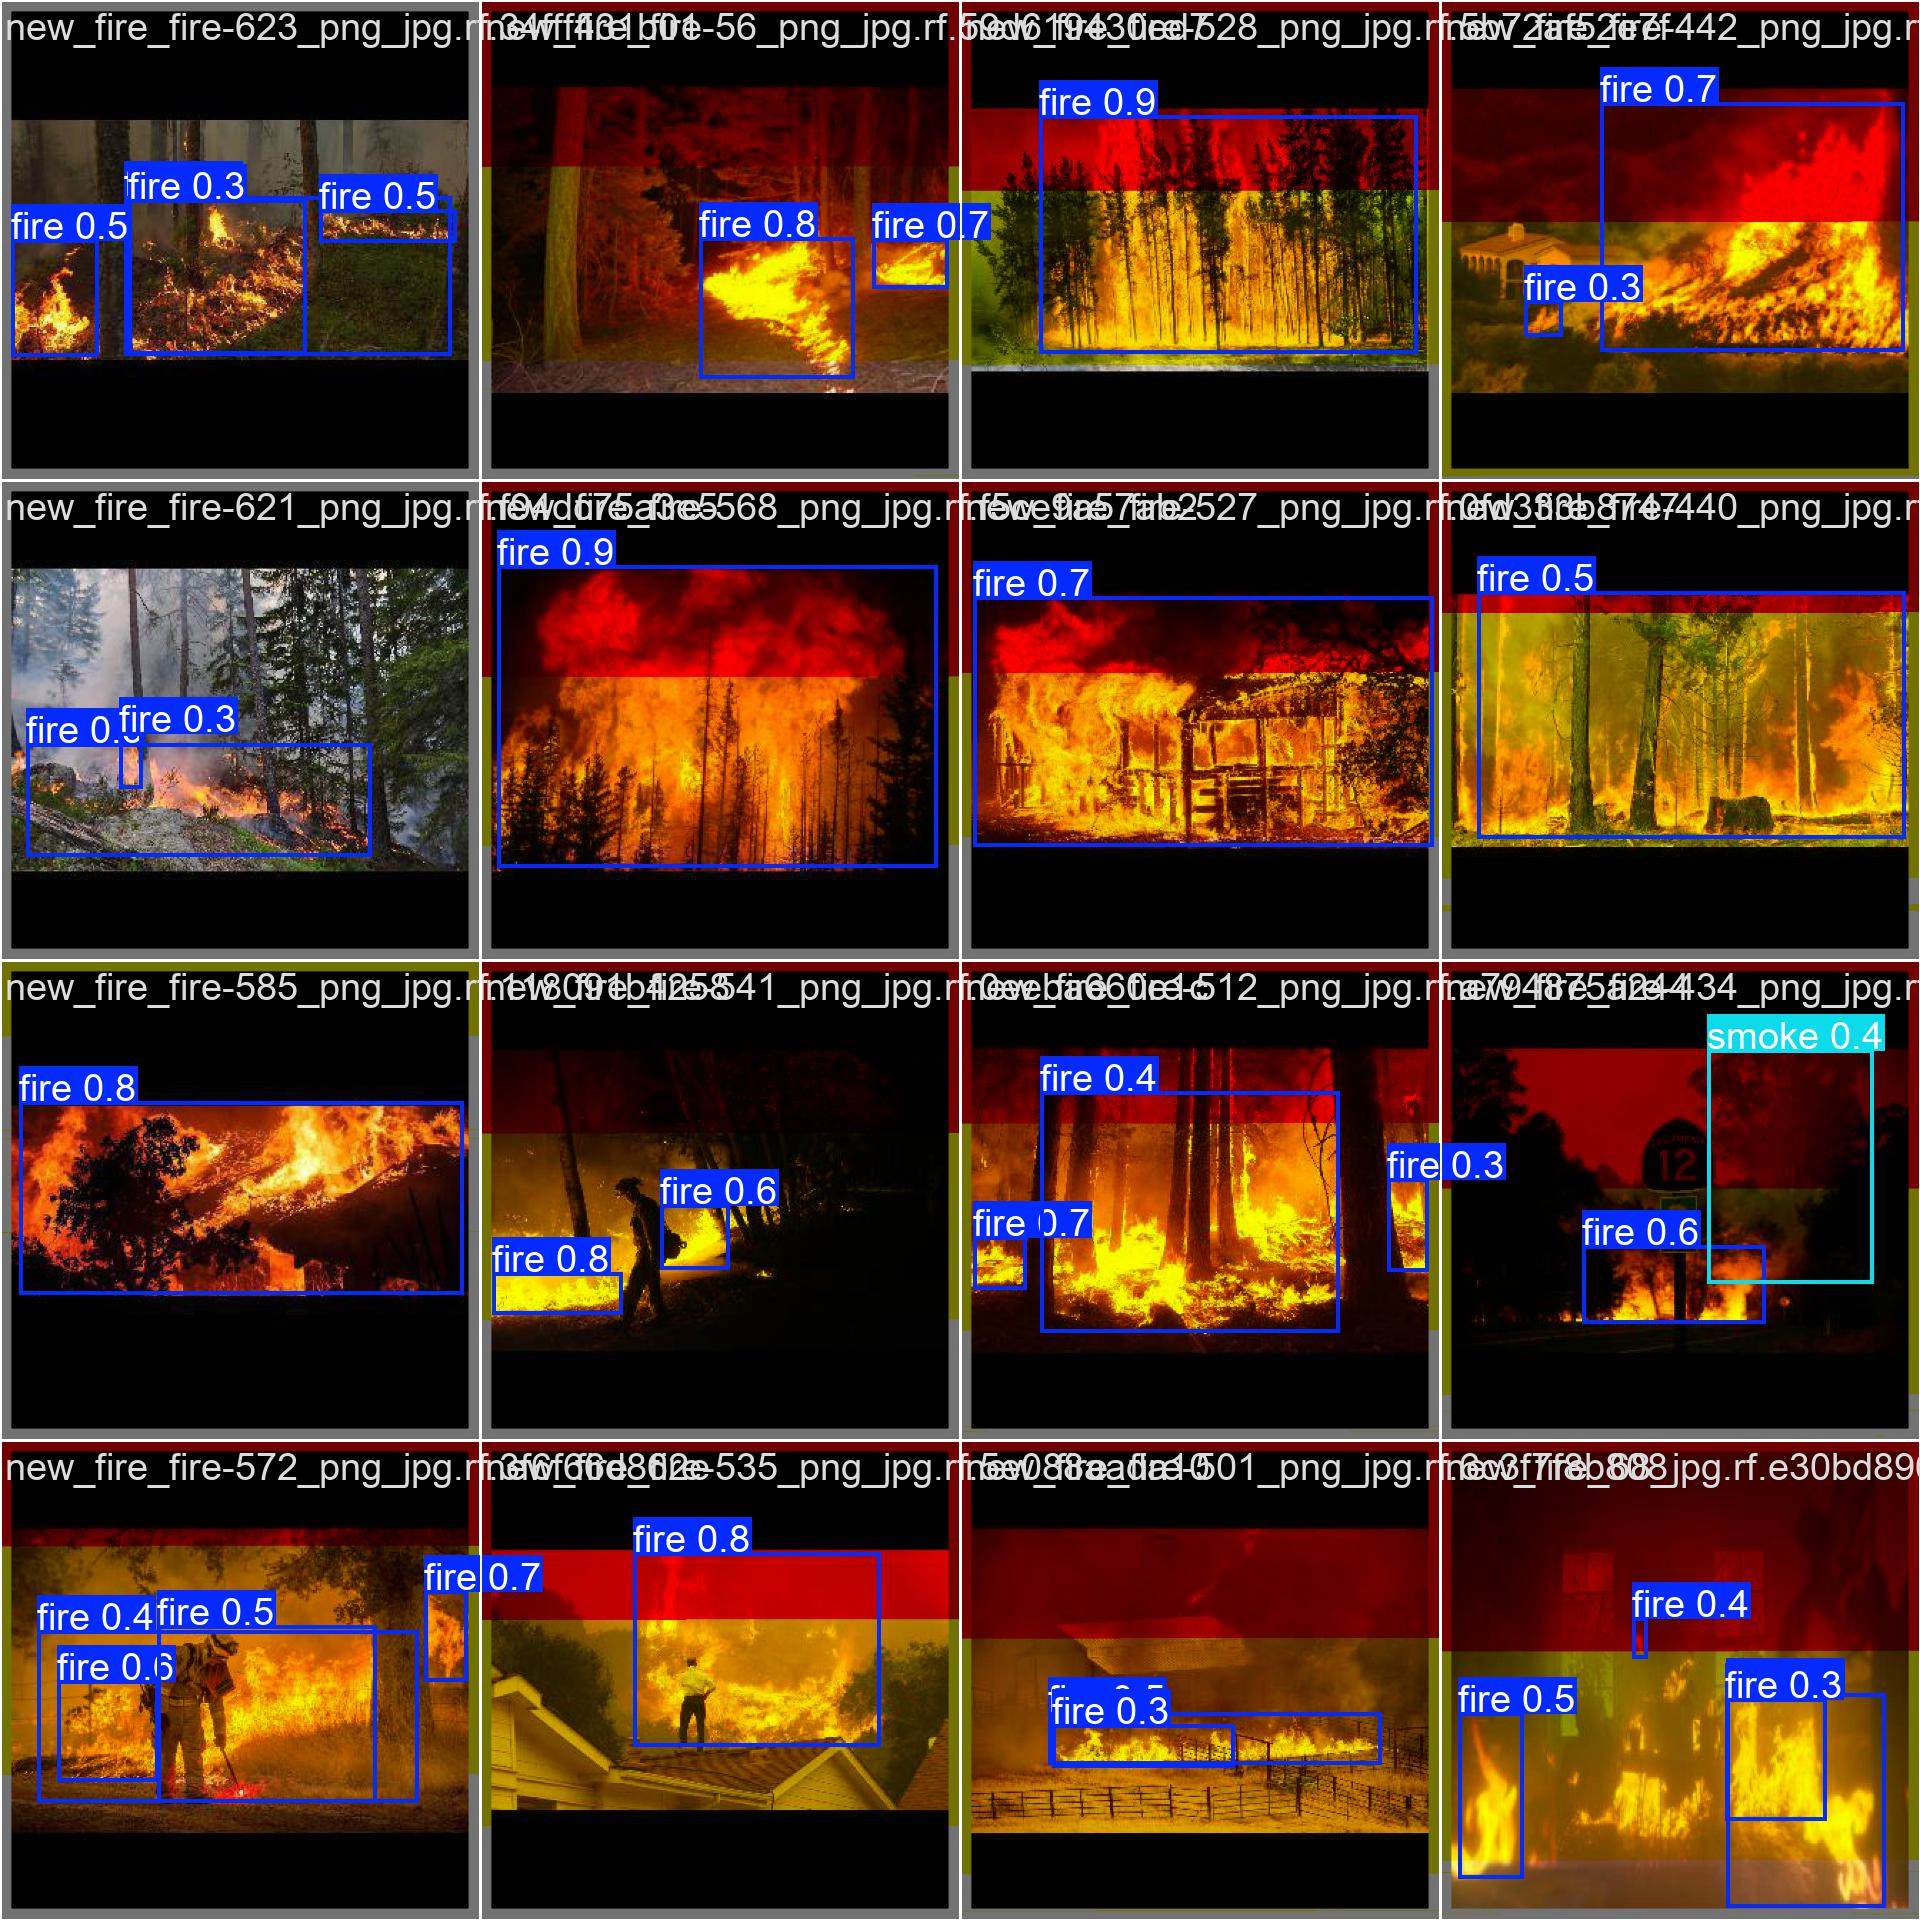

In [17]:
from IPython.display import Image
Image(filename="runs/detect/val/val_batch0_pred.jpg")

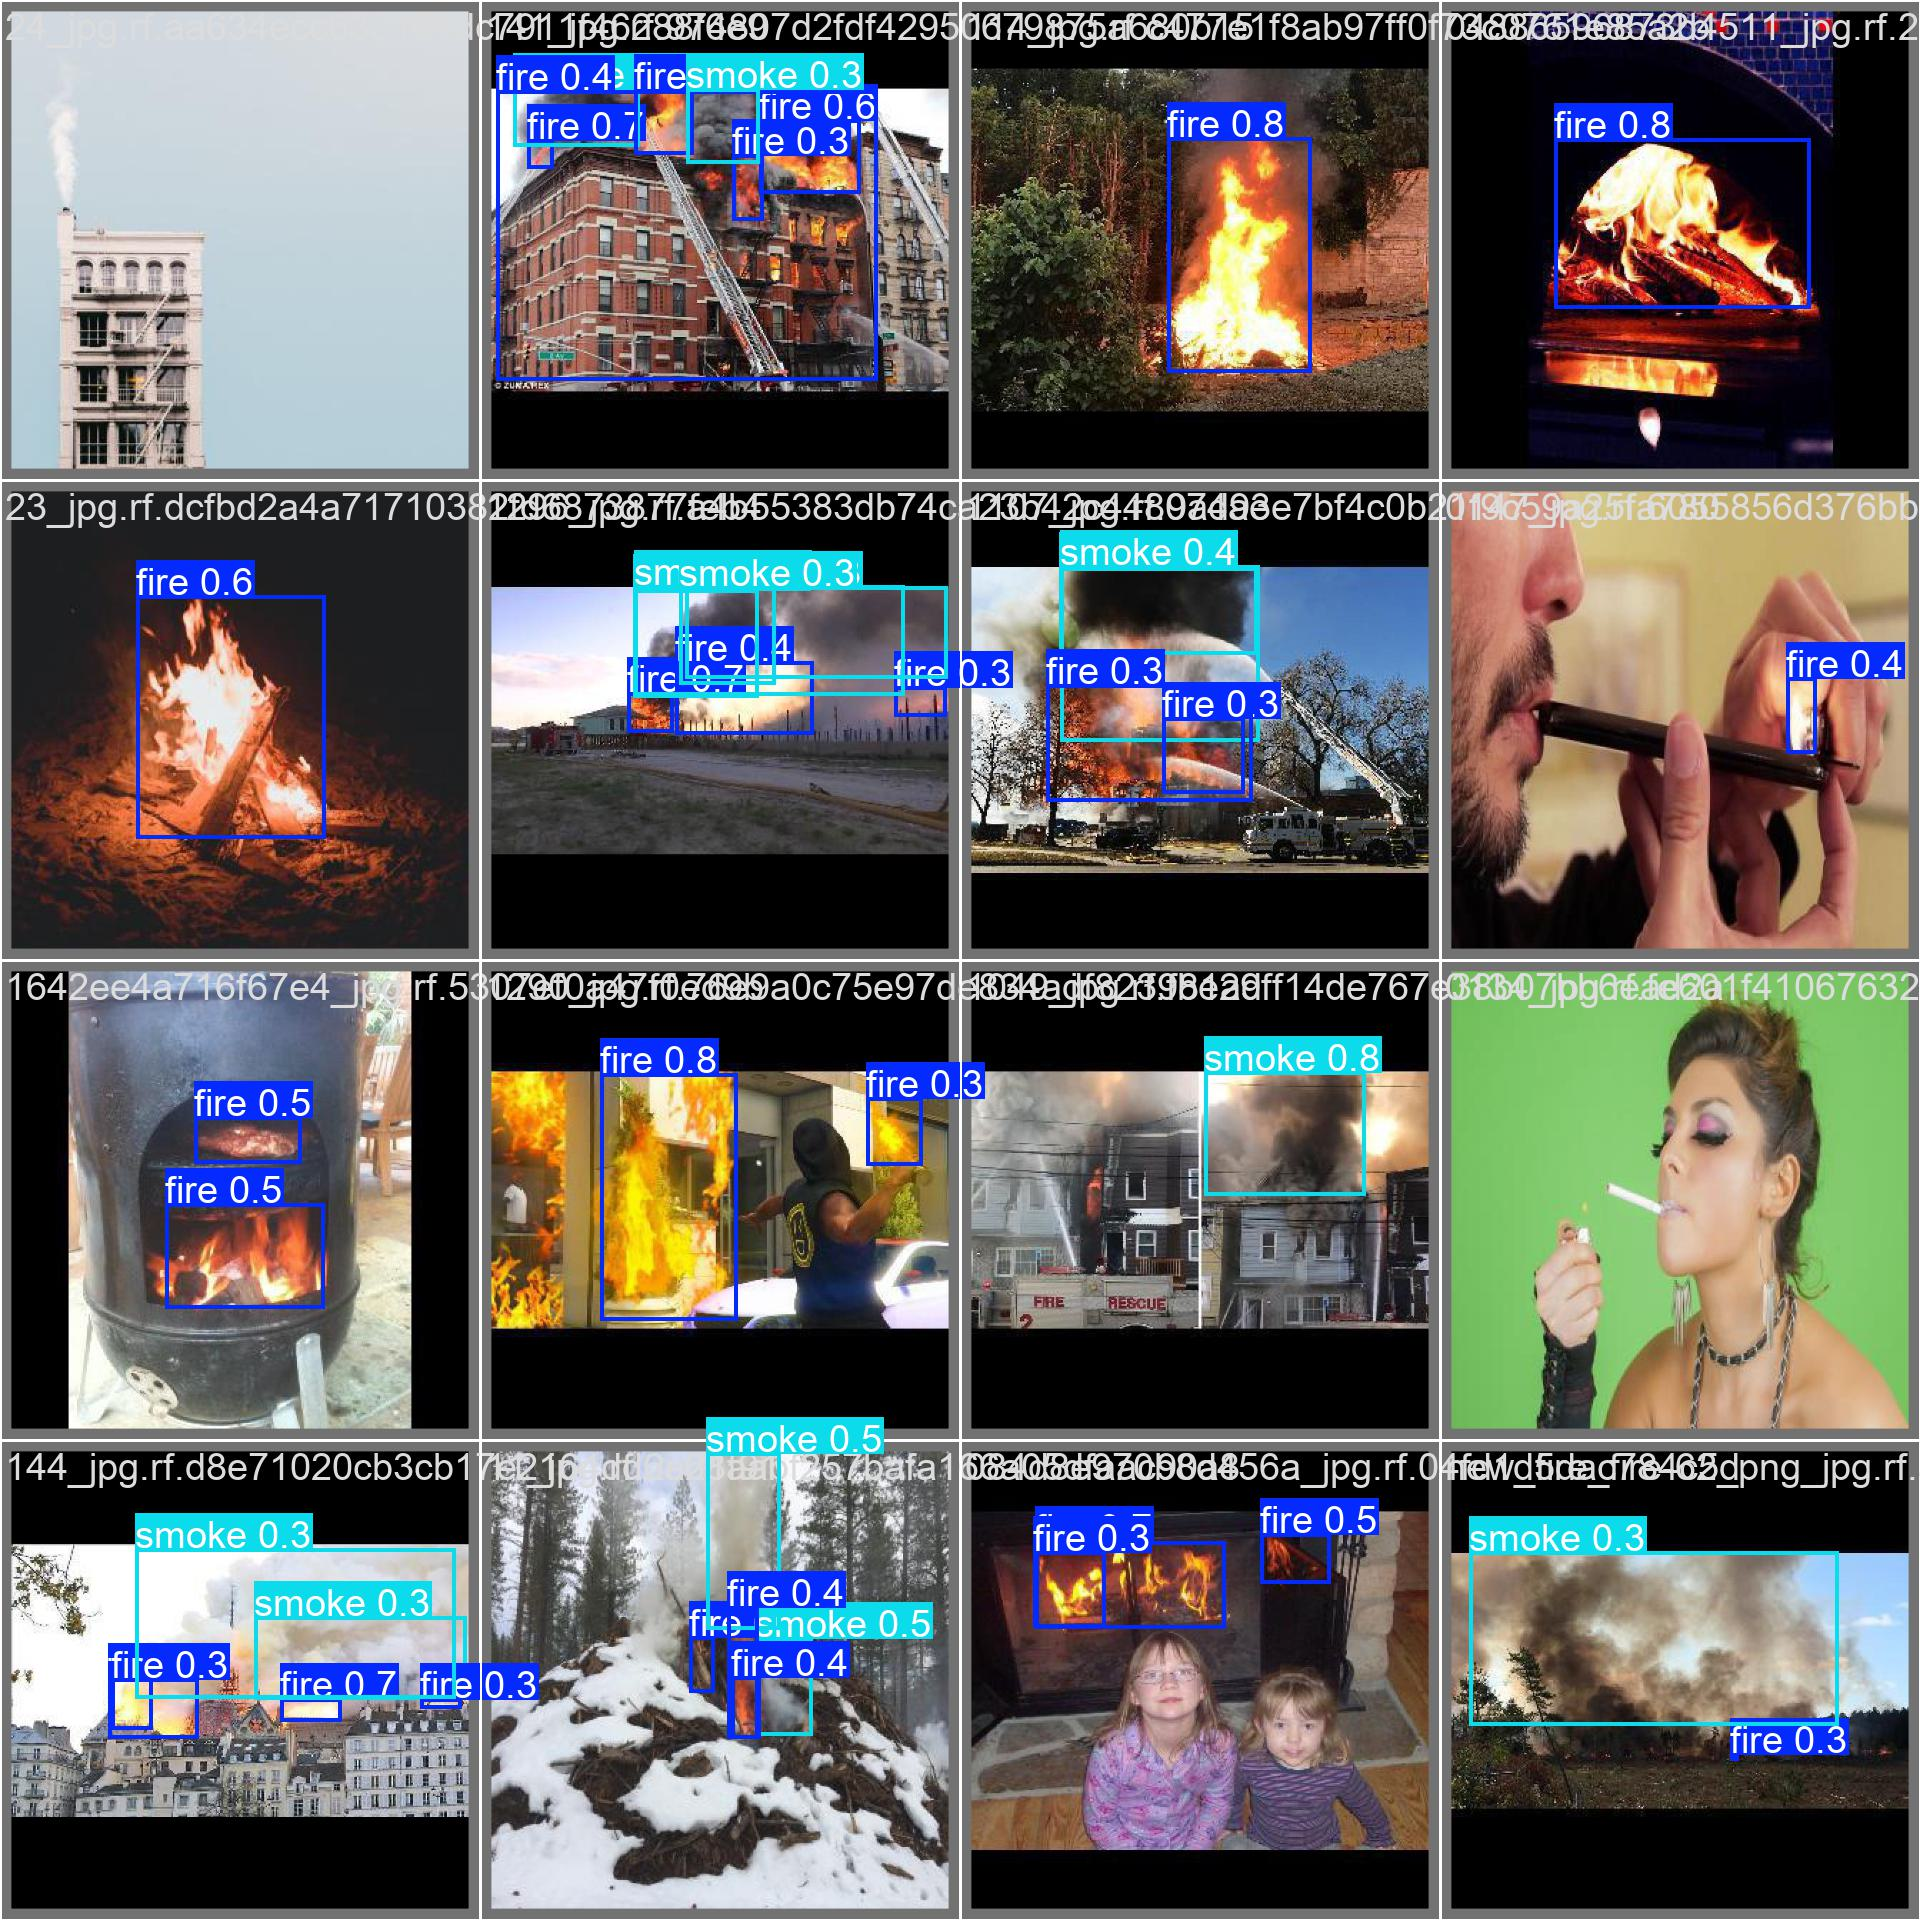

In [18]:
from IPython.display import Image
Image(filename="runs/detect/val/val_batch1_pred.jpg")

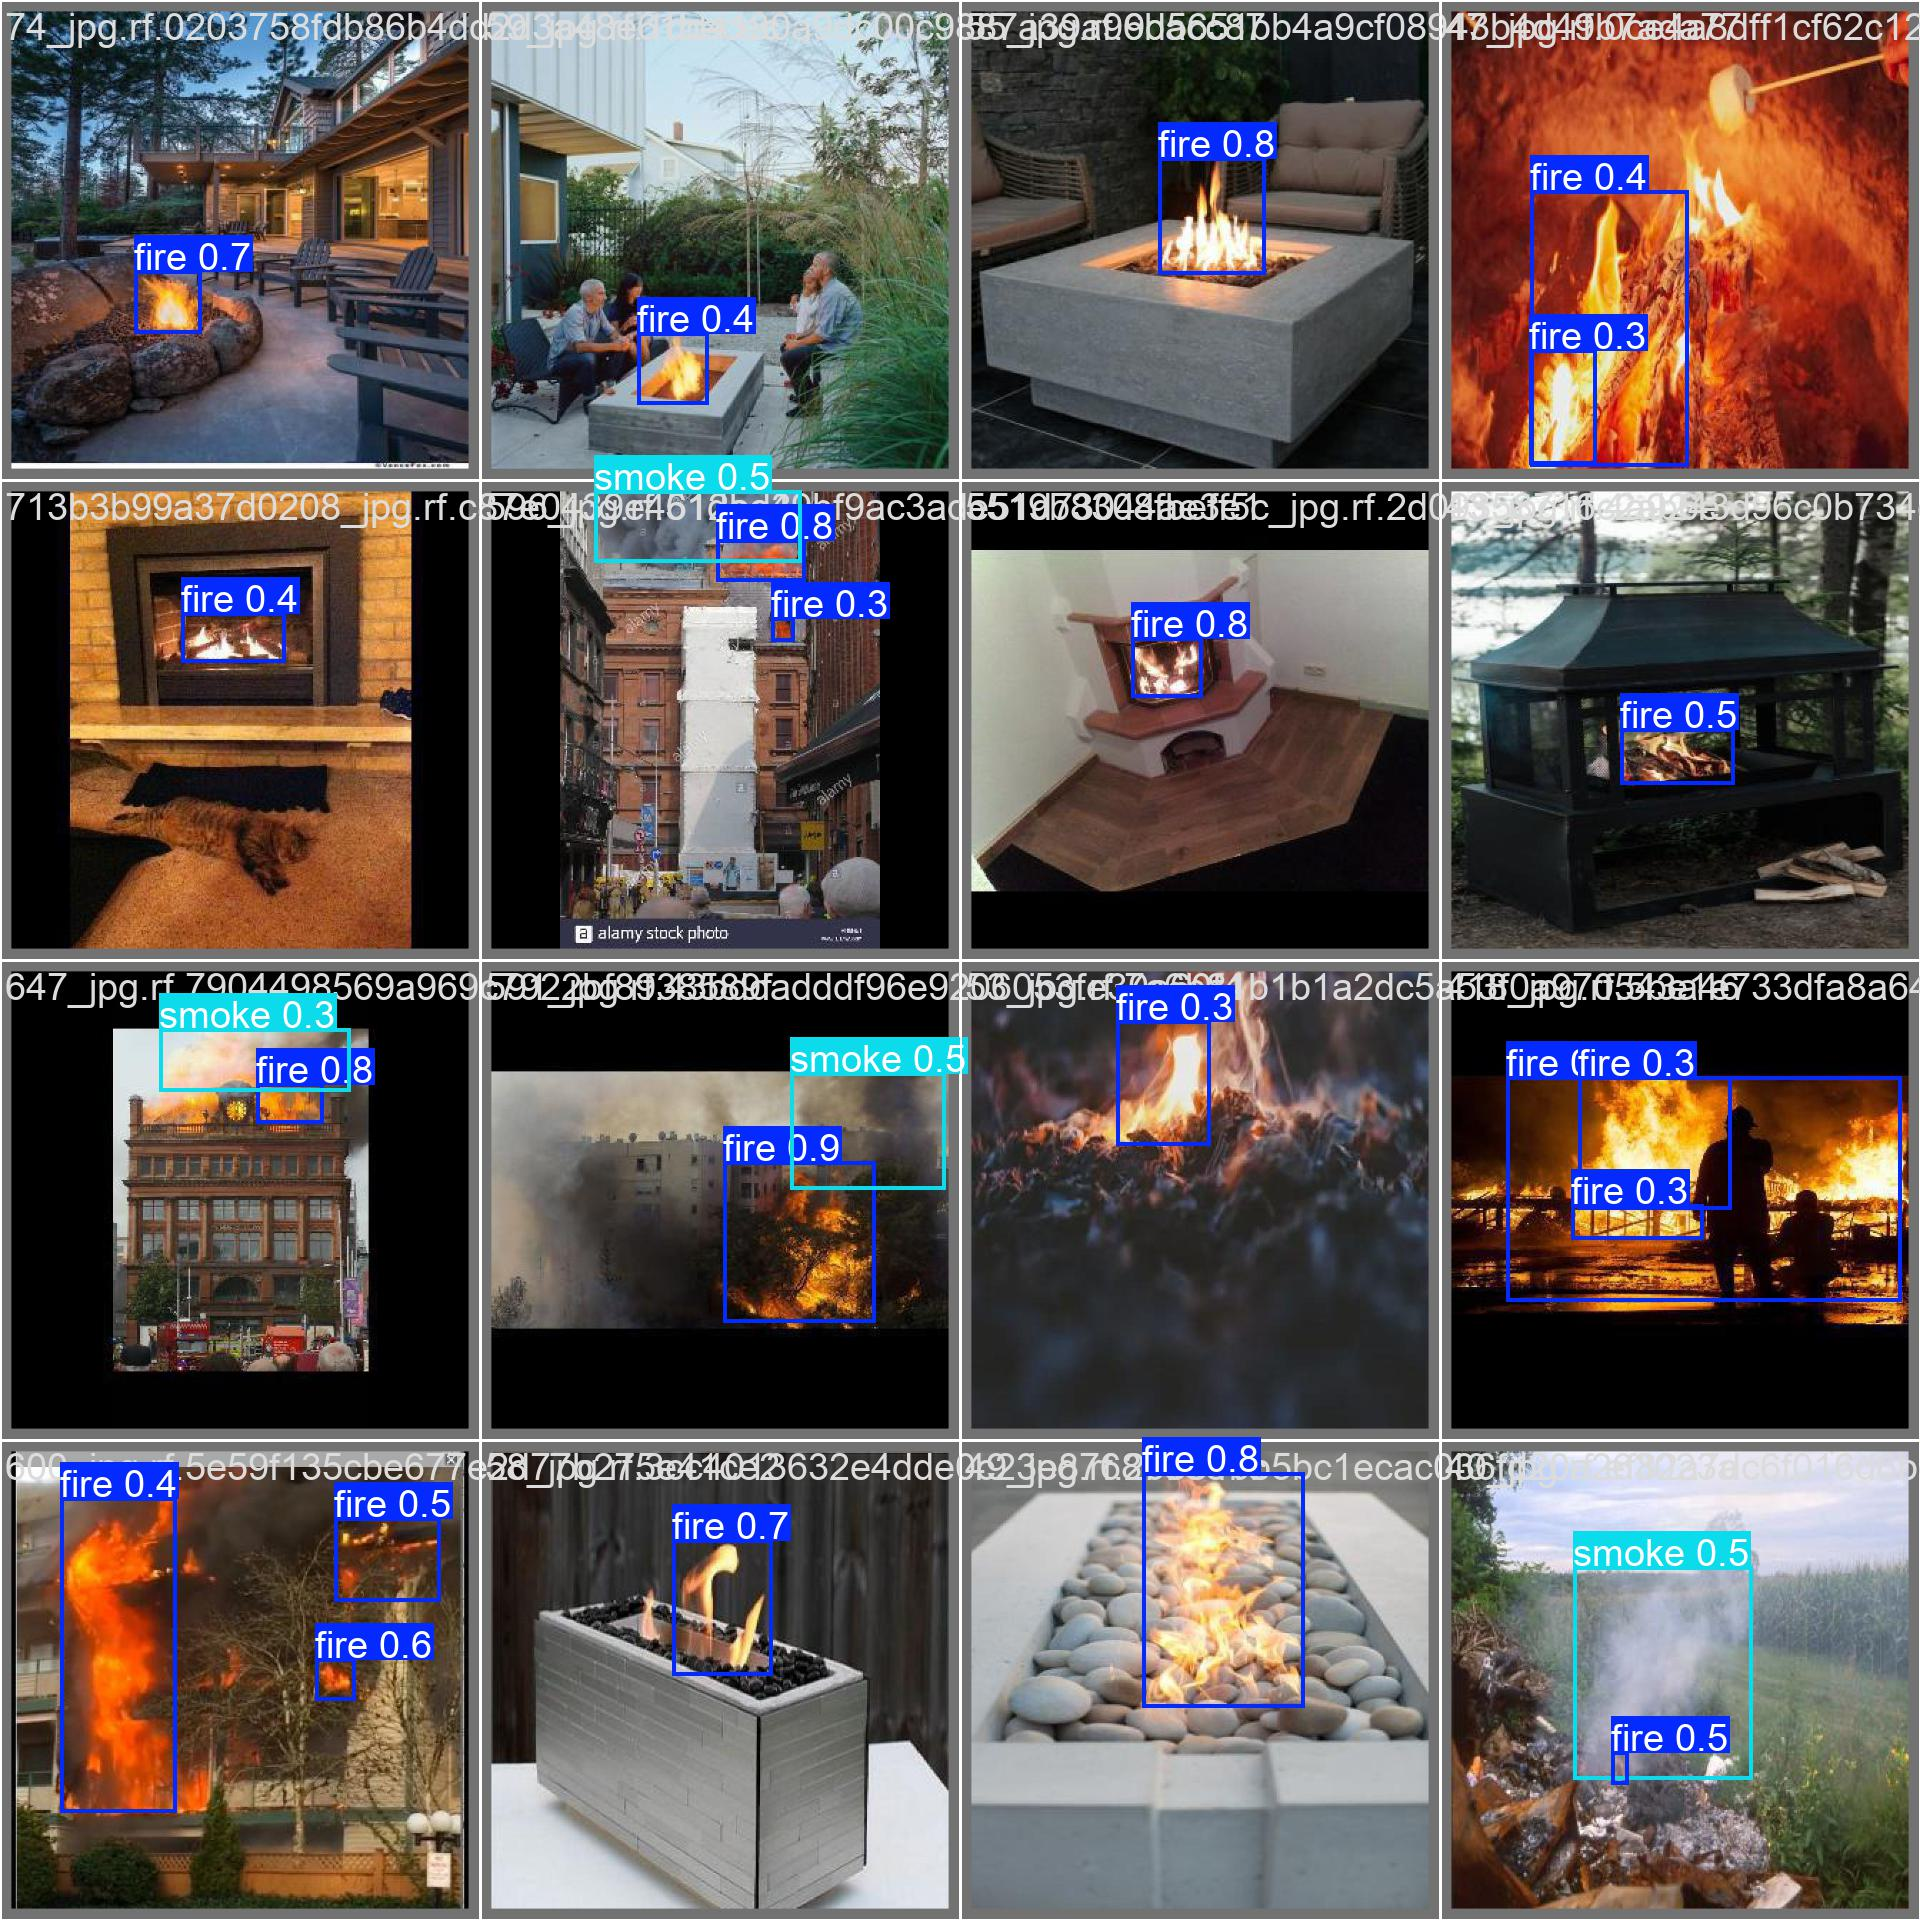

In [19]:
from IPython.display import Image
Image(filename="runs/detect/val/val_batch2_pred.jpg")

**Evaluate with Running inference after training the model**

Running inference with a **YOLO model** from **Ultralytics**

After training the model, it saved as **best.pt** and i prefer to change the model's name as **fire.pt**

**<----using single image---->**

In [4]:
from ultralytics import YOLO

# Load your renamed model
model = YOLO("fire.pt")

# Run inference
results = model("fire_and_smoke/fire9.jpg")
results[0].show()


image 1/1 C:\Users\user\Desktop\ML Projects\ML Assignment\fire_and_smoke\fire9.jpg: 320x640 1 fire, 254.1ms
Speed: 20.7ms preprocess, 254.1ms inference, 15.0ms postprocess per image at shape (1, 3, 320, 640)


**<----using multiple images---->**

In [ ]:
from ultralytics import YOLO
import glob
import os

# Load the model
model = YOLO("fire.pt")

# Folder with input images
input_folder = "fire_and_smoke"

# Collect all jpg, jpeg, png files
image_paths = []
for ext in ["*.jpg", "*.jpeg", "*.png"]:
    image_paths.extend(glob.glob(os.path.join(input_folder, ext)))

# Run inference and display each image
for img_path in image_paths:
    results = model(img_path)  # inference
    results[0].show()          # displays the image with predictions (does NOT save)

**<----using video---->**

In [ ]:
from ultralytics import YOLO

# Load your model
model = YOLO("fire.pt")

# Run inference on a video
results = model("fire_and_smoke/Huge Pile of Trees Fire-inside.mp4",show=True)  # replace with your video path

In [7]:
import streamlit as st
from ultralytics import YOLO
from PIL import Image
import io

# Use st.cache_resource to load the model only once
# This is crucial for fast performance in Streamlit
@st.cache_resource
def load_model():
    # The file path must match where 'fire.pt' is saved in your GitHub repo
    model = YOLO("fire.pt")
    return model

# Main app logic
st.title("🔥 Fire Detection with YOLOv8 and Streamlit")

# Load the model
try:
    model = load_model()
    st.success("Model 'fire.pt' loaded successfully!")
except Exception as e:
    st.error(f"Error loading model: {e}")
    st.stop() # Stop the app if model loading fails

# File Uploader
uploaded_file = st.file_uploader("Upload an Image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display the uploaded image
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)
    
    # Inference button
    if st.button("Detect Fire"):
        # Convert uploaded file to PIL Image
        image = Image.open(uploaded_file)
        
        # Run inference
        # The model expects a path, a PIL image, or a numpy array
        results = model(image) 
        
        # Process and display results
        if results:
            # The .plot() method returns an image with bounding boxes
            annotated_img_array = results[0].plot() 
            
            # Convert the result (numpy array) back to a format Streamlit can display
            annotated_img = Image.fromarray(annotated_img_array[..., ::-1]) # Ultralytics uses BGR, convert to RGB
            
            st.subheader("Detection Results")
            st.image(annotated_img, caption="Detected Fire", use_column_width=True)
            
            # Show number of detections
            st.info(f"Detected **{len(results[0].boxes)}** instances of fire.")
        else:
            st.warning("No detections found.")

2025-09-29 11:57:16.828 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-29 11:57:17.739 
  command:

    streamlit run C:\Anaconda\envs\anaconda-2025.06-py3.11\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-29 11:57:17.740 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-29 11:57:17.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-29 11:57:17.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-29 11:57:17.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-29 11:57:18.134 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-29 11:57:18.136 Thread 

#                                                            Thank you!!